# Análise Exploratória dos Dados

## Índice

- [Link para retornar ao notebook principal](#retornar-para-notebook-principal---mainipynb)
- [Importando bibliotecas e pacotes](#importando-bibliotecas-e-pacotes)
- [Importando datasets](#importando-datasets)
- [Breve apresentação dos dados](#breve-apresentacao-dos-dados)
- [MeanShift](#meanshift)
- [KMeans](#kmeans)
- [Fuzzy C-Means](#fuzzy-c-means)
- [DBSCAN](#dbscan)

## Retornar para notebook principal - main.ipynb

[Link para notebook principal](./main.ipynb)

## Importando bibliotecas e pacotes

In [1]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.cluster import KMeans, MeanShift, DBSCAN, estimate_bandwidth
from sklearn.model_selection import GridSearchCV
from matplotlib import pyplot as plt
from fcmeans import FCM
import seaborn as sns
import pandas as pd
import numpy as np

## Importando datasets

In [2]:
df_ureia = pd.read_csv("../databases/processed/ureia_valores_mann_kendall.csv", sep = ",", index_col = "subject_id")
df_creatinina = pd.read_csv("../databases/processed/cretinina_valores_mann_kendall.csv", sep = ",", index_col = "subject_id")

## Breve apresentacao dos dados

### DATASET ureia

In [3]:
df_ureia.head(10)

Unnamed: 0  tendencia         p         z       Tau  inclinacao  \
subject_id                                                                    
10001884             0          0  0.094718 -1.671020 -0.571429       -3.20   
10004422             1          0  0.171563  1.367198  0.476190        1.75   
10004733             2          2  0.009809 -2.582485 -0.857143       -2.75   
10005606             3          1  0.026224  2.222876  0.714286        1.25   
10010867             4          0  0.272341  1.097688  0.380952        0.50   
10019777             5          0  0.356441 -0.922168 -0.333333       -1.00   
10020944             6          2  0.002667 -3.003757 -1.000000       -2.00   
10023486             7          1  0.002667  3.003757  1.000000        5.25   
10032381             8          1  0.007680  2.665813  0.857143        3.00   
10035747             9          0  1.000000  0.000000 -0.047619        0.00   

            intercepto  gender  dias_ureia_alta  
subject_id                                       
10001884         39.60       1                0  
10004422         14.75       1                0  
10004733         45.25       0                0  
10005606          6.25       1                0  
10010867          4.50       0                0  
10019777         20.00       0                0  
10020944         28.00       0                0  
10023486         47.25       1                7  
10032381          5.00       0                0  
10035747         18.00       0                0

In [4]:
df_ureia.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3259 entries, 10001884 to 19999442
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       3259 non-null   int64  
 1   tendencia        3259 non-null   int64  
 2   p                3259 non-null   float64
 3   z                3259 non-null   float64
 4   Tau              3259 non-null   float64
 5   inclinacao       3259 non-null   float64
 6   intercepto       3259 non-null   float64
 7   gender           3259 non-null   int64  
 8   dias_ureia_alta  3259 non-null   int64  
dtypes: float64(5), int64(4)
memory usage: 254.6 KB


In [5]:
df_ureia = df_ureia.drop(columns = ["Unnamed: 0"])

### DATASET creatinina

In [6]:
df_creatinina.head(10)

Unnamed: 0  tendencia         p         z       Tau  inclinacao  \
subject_id                                                                    
10001884             0          2  0.022687 -2.278664 -0.761905   -0.100000   
10004422             1          0  0.846451 -0.193649 -0.095238    0.000000   
10004733             2          0  0.124306 -1.536947 -0.523810   -0.200000   
10005606             3          0  0.180392 -1.339549 -0.428571   -0.025000   
10010867             4          0  0.340762 -0.952661 -0.333333   -0.040000   
10019777             5          2  0.031419 -2.151725 -0.714286   -0.100000   
10020944             6          0  0.525358  0.635107  0.238095    0.025000   
10023486             7          0  0.094718 -1.671020 -0.571429   -0.200000   
10032381             8          0  0.211300 -1.250000 -0.285714    0.000000   
10035747             9          0  0.126370 -1.528574 -0.476190   -0.033333   

            intercepto  gender  dias_creatinina_alta  
subject_id                                            
10001884         1.200       1                     1  
10004422         0.700       1                     0  
10004733         4.000       0                     7  
10005606         0.575       1                     0  
10010867         0.620       0                     0  
10019777         1.000       0                     0  
10020944         1.525       0                     7  
10023486         3.700       1                     7  
10032381         1.200       0                     0  
10035747         1.000       0                     0

In [7]:
df_creatinina.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3262 entries, 10001884 to 19999442
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            3262 non-null   int64  
 1   tendencia             3262 non-null   int64  
 2   p                     3262 non-null   float64
 3   z                     3262 non-null   float64
 4   Tau                   3262 non-null   float64
 5   inclinacao            3262 non-null   float64
 6   intercepto            3262 non-null   float64
 7   gender                3262 non-null   int64  
 8   dias_creatinina_alta  3262 non-null   int64  
dtypes: float64(5), int64(4)
memory usage: 254.8 KB


In [8]:
df_creatinina = df_creatinina.drop(columns = ["Unnamed: 0"])

## Teste com os dataset

### Aqui será testada a correlação entre as variáveis

Em caso de correlação muito alta (90% ou mais), uma das variáveis será mantida e a(s) outra(s) removida(s) do dataset

#### DATASET ureia

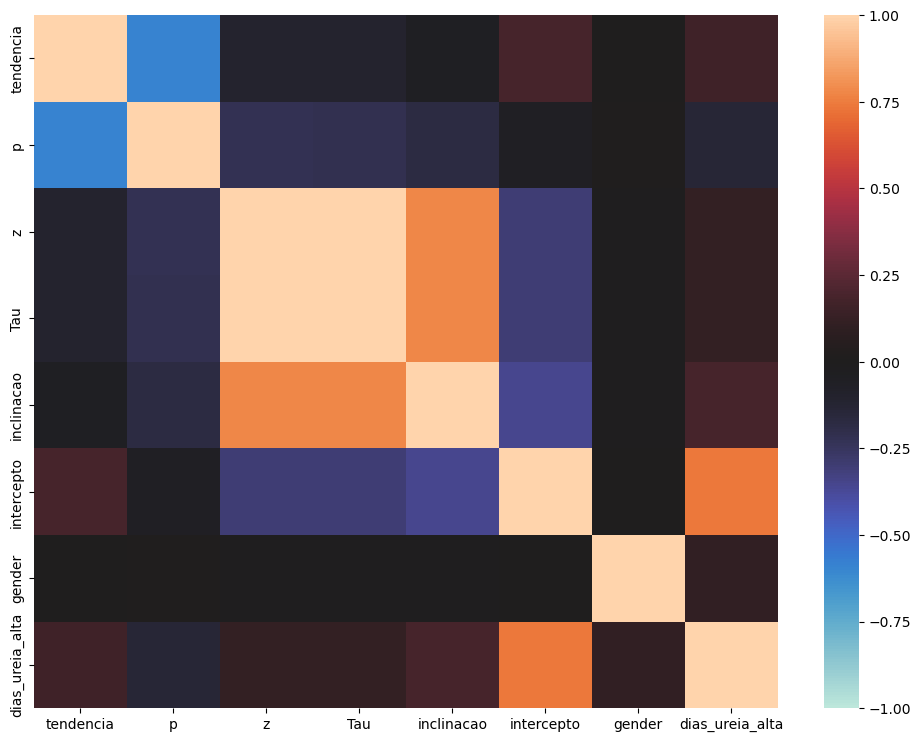

In [9]:
plt.figure(figsize = (12 ,9))

sns.heatmap(df_ureia.corr(), vmin = -1, vmax = 1, center = 0)

plt.show()

Como podemos ver no mapa de calor acima:
- As variáveis `z` e `Tau` possuem alto nível de correlação;
- Correlação essa de 100%.

Portanto será escolhido a coluna *z* para deixar o dataset.

##### Excluindo a coluna *z*

In [9]:
df_ureia = df_ureia.drop(columns = ["z"])
df_ureia.head(5)

tendencia         p       Tau  inclinacao  intercepto  gender  \
subject_id                                                                  
10001884            0  0.094718 -0.571429       -3.20       39.60       1   
10004422            0  0.171563  0.476190        1.75       14.75       1   
10004733            2  0.009809 -0.857143       -2.75       45.25       0   
10005606            1  0.026224  0.714286        1.25        6.25       1   
10010867            0  0.272341  0.380952        0.50        4.50       0   

            dias_ureia_alta  
subject_id                   
10001884                  0  
10004422                  0  
10004733                  0  
10005606                  0  
10010867                  0

#### DATASET creatinina

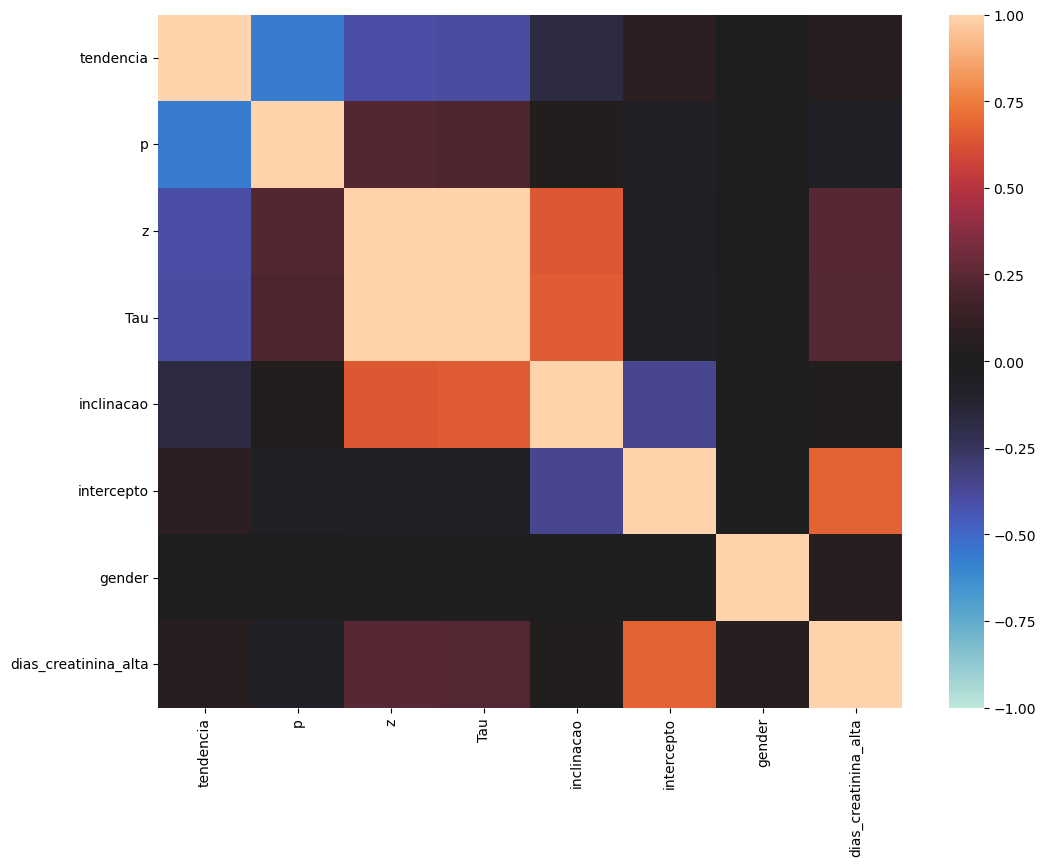

In [11]:
plt.figure(figsize = (12 ,9))

sns.heatmap(df_creatinina.corr(), vmin = -1, vmax = 1, center = 0)

plt.show()

Como podemos ver no mapa de calor acima:
- As variáveis `z` e `Tau` possuem alto nível de correlação;
- Correlação essa de 100%.

Portanto será escolhido a coluna *z* para deixar o dataset.

##### Excluindo a coluna *z*

In [10]:
df_creatinina = df_creatinina.drop(columns = ["z"])
df_creatinina.head(5)

tendencia         p       Tau  inclinacao  intercepto  gender  \
subject_id                                                                  
10001884            2  0.022687 -0.761905      -0.100       1.200       1   
10004422            0  0.846451 -0.095238       0.000       0.700       1   
10004733            0  0.124306 -0.523810      -0.200       4.000       0   
10005606            0  0.180392 -0.428571      -0.025       0.575       1   
10010867            0  0.340762 -0.333333      -0.040       0.620       0   

            dias_creatinina_alta  
subject_id                        
10001884                       1  
10004422                       0  
10004733                       7  
10005606                       0  
10010867                       0

## Aplicação dos Algoritmos de Agrupamento

### Criando hiper-parâmetros que serão utilizados pela maioria dos algoritmos

In [11]:
lista_metricas_silhueta:list[str] = ["cityblock", "cosine", "euclidean", "l1", "l2", "manhattan"]

### MeanShift

#### Criando variáveis que serão usadas durante todo o algoritmo MeanShift

In [12]:
lista_quantis_escolhidos:list[float] = [0.2, 0.25, 0.3, 0.4, 0.5, 0.6]

#### DATASET ureia

In [15]:
for quantil in lista_quantis_escolhidos:
    bandwidth:float = estimate_bandwidth(X = df_ureia,
                                         quantile = quantil,
                                         random_state = 42,
                                         n_jobs = -1)
    meanshift_ureia = MeanShift(bandwidth = bandwidth,
                                max_iter = 500,
                                n_jobs = -1)
    meanshift_ureia.fit(df_ureia)
    y_ureia:list[float] = meanshift_ureia.fit_predict(df_ureia)
    
    silhouette:list[float] = []
    print(f"PARA O QUANTIL < {quantil} > OS RESULTADOS SÃO:", end = "\n")
    print("=" * 20, end = "\n")

    if len(np.unique(meanshift_ureia.labels_)) > 1:
        for metrica in lista_metricas_silhueta:
            silhouette.append(silhouette_score(df_ureia, y_ureia, metric = metrica))

        davies_bouldin:float = davies_bouldin_score(df_ureia, y_ureia)
        calinski:float = calinski_harabasz_score(df_ureia, y_ureia)

        print("SILHOUETTE SCORE: ", silhouette, end = "\n")
        print("DAVIS-BOULDIN SCORE: ", davies_bouldin, end = "\n")
        print("CALINSKI-HARABASZ SCORE: ", calinski, end = "\n")
    else:
        print("Não foi possível testar os métodos de:", end = "\n")
        print("- SILHOUETTE;", end = "\n")
        print("- DAVIS-BOULDIN;", end = "\n")
        print("- CALINSKI-HARABASZ.", end = "\n")
        print("Pois a quantidade de grupos foi menor que 2.", end = "\n")

    print(f"QUANTIDADE DE GRUPOS: {len(np.unique(meanshift_ureia.labels_))}", end = "\n")
    print("=" * 20, end = "\n\n\n")

PARA O QUANTIL < 0.2 > OS RESULTADOS SÃO:
SILHOUETTE SCORE:  [0.6113437647141121, -0.740047055966548, 0.6389183169571465, 0.6113437647141121, 0.6389183169571465, 0.6113437647141121]
DAVIS-BOULDIN SCORE:  0.7709580807330966
CALINSKI-HARABASZ SCORE:  1053.2175539145396
QUANTIDADE DE GRUPOS: 6


PARA O QUANTIL < 0.25 > OS RESULTADOS SÃO:
SILHOUETTE SCORE:  [0.6173511283433807, -0.7452287823955797, 0.6454468422691914, 0.6173511283433807, 0.6454468422691914, 0.6173511283433807]
DAVIS-BOULDIN SCORE:  0.657361016122098
CALINSKI-HARABASZ SCORE:  1466.909817122497
QUANTIDADE DE GRUPOS: 5


PARA O QUANTIL < 0.3 > OS RESULTADOS SÃO:
SILHOUETTE SCORE:  [0.6196668836710946, -0.5168956612047805, 0.6470716687868078, 0.6196668836710946, 0.6470716687868078, 0.6196668836710946]
DAVIS-BOULDIN SCORE:  0.5908746713234466
CALINSKI-HARABASZ SCORE:  1903.3731141775247
QUANTIDADE DE GRUPOS: 4


PARA O QUANTIL < 0.4 > OS RESULTADOS SÃO:
Não foi possível testar os métodos de:
- SILHOUETTE;
- DAVIS-BOULDIN;
- CAL

Como podemos ver acima, o melhor resultado aparece com o quartil = 0.3, ou seja, 30%.

O resultado é:
```txt
4 grupos são formados.

As acurácias são:
- Silhueta          :   0.64707 (Usando a distância euclidiana);
- Davis-Bouldin     :   0.59087;
- Calinski-Harabasz :   1903.37.

Lembrando que:
- Silhueta          -> maior melhor (varia entre 0.0 e 1.0);
- Davis-Bouldin     -> quanto menor melhor (varia entre 0.0 e infinito);
- Calinski-Harabasz -> quanto maior melhor (varia entre 0.0 e infinito).
```

##### Construindo a versão otimizada do modelo

In [13]:
bandwidth:float = estimate_bandwidth(X = df_ureia,
                                     quantile = 0.3,
                                     random_state = 42,
                                     n_jobs = -1)
meanshift_ureia = MeanShift(bandwidth = bandwidth,
                            max_iter = 500,
                            n_jobs = -1)
meanshift_ureia.fit(df_ureia)
y_ureia:list[float] = meanshift_ureia.fit_predict(df_ureia)

##### Versão gráfica

<Figure size 1200x900 with 0 Axes>

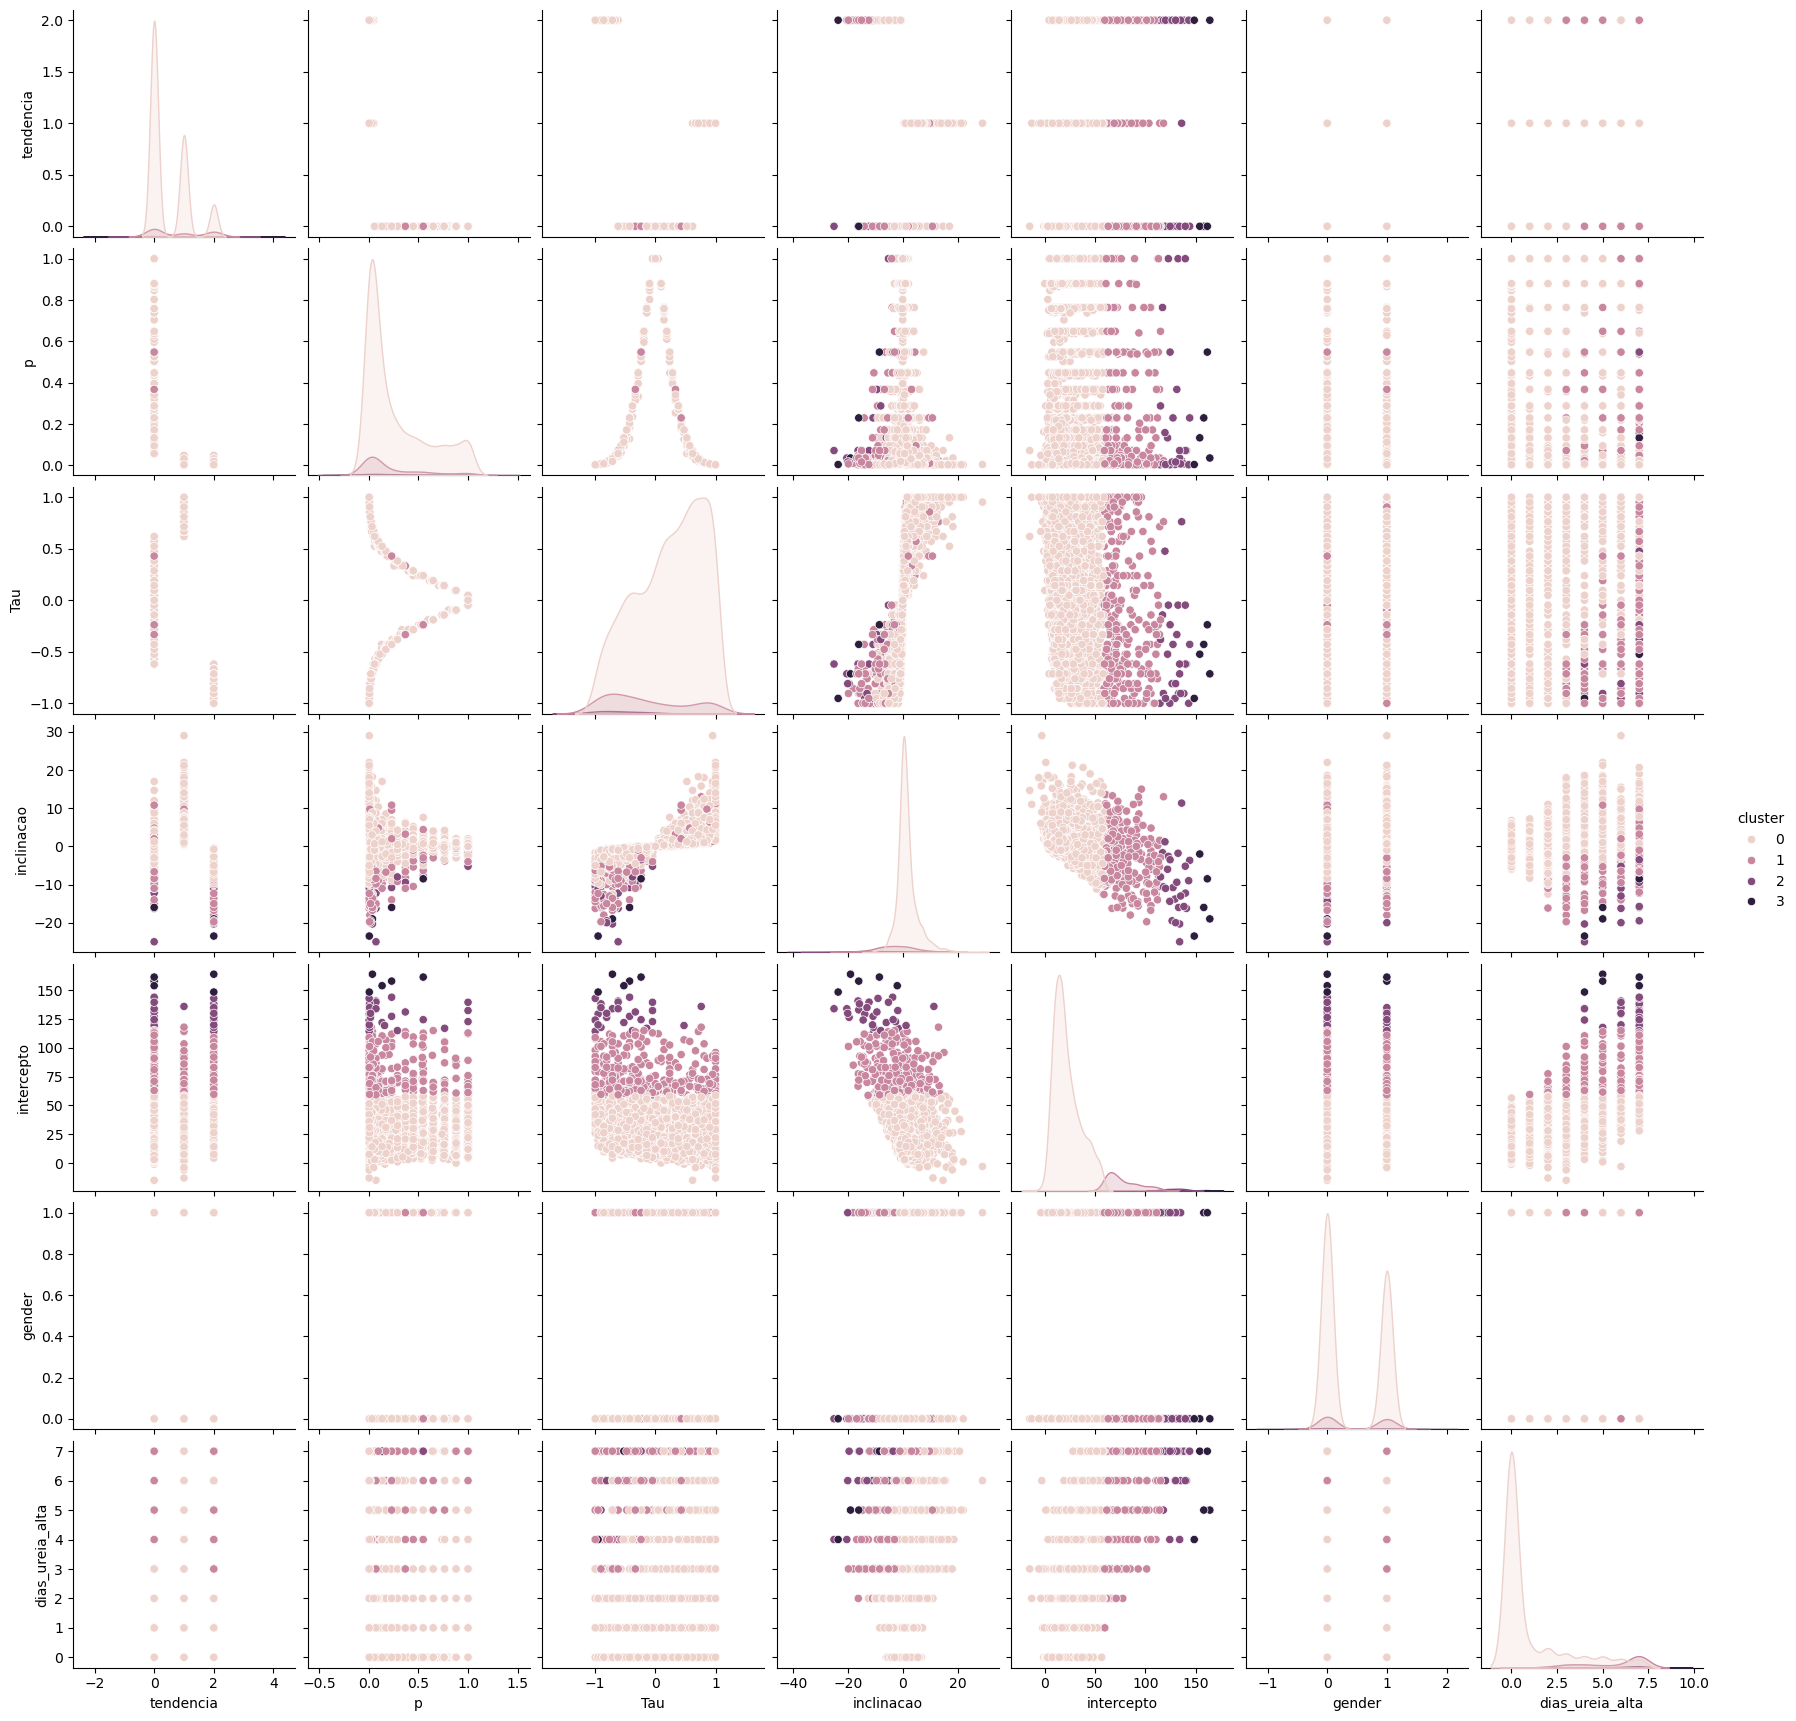

In [18]:
df_temp = df_ureia.copy()
df_temp["cluster"] = y_ureia

plt.figure(figsize = (12, 9))

sns.pairplot(df_temp, hue = "cluster")

plt.show()

#### DATASET creatinina

In [19]:
for quantil in lista_quantis_escolhidos:
    bandwidth:float = estimate_bandwidth(X = df_creatinina,
                                         quantile = quantil,
                                         random_state = 42,
                                         n_jobs = -1)
    meanshift_creatinina = MeanShift(bandwidth = bandwidth,
                                     max_iter = 500,
                                     n_jobs = -1)
    meanshift_creatinina.fit(df_creatinina)
    y_creatinina:list[float] = meanshift_creatinina.fit_predict(df_creatinina)
    
    silhouette:list[float] = []
    print(f"PARA O QUANTIL < {quantil} > OS RESULTADOS SÃO:", end = "\n")
    print("=" * 20, end = "\n")

    if len(np.unique(meanshift_creatinina.labels_)) > 1:
        for metrica in lista_metricas_silhueta:
            silhouette.append(silhouette_score(df_creatinina, y_creatinina, metric = metrica))

        davies_bouldin:float = davies_bouldin_score(df_creatinina, y_creatinina)
        calinski:float = calinski_harabasz_score(df_creatinina, y_creatinina)

        print("SILHOUETTE SCORE: ", silhouette, end = "\n")
        print("DAVIS-BOULDIN SCORE: ", davies_bouldin, end = "\n")
        print("CALINSKI-HARABASZ SCORE: ", calinski, end = "\n")
    else:
        print("Não foi possível testar os métodos de:", end = "\n")
        print("- SILHOUETTE;", end = "\n")
        print("- DAVIS-BOULDIN;", end = "\n")
        print("- CALINSKI-HARABASZ.", end = "\n")
        print("Pois a quantidade de grupos foi menor que 2.", end = "\n")

    print(f"QUANTIDADE DE GRUPOS: {len(np.unique(meanshift_creatinina.labels_))}", end = "\n")
    print("=" * 20, end = "\n\n\n")

PARA O QUANTIL < 0.2 > OS RESULTADOS SÃO:
SILHOUETTE SCORE:  [0.42553809982860574, -0.07261559725711453, 0.446173953163252, 0.42553809982860574, 0.446173953163252, 0.42553809982860574]
DAVIS-BOULDIN SCORE:  0.8988269991827269
CALINSKI-HARABASZ SCORE:  2204.0361193456115
QUANTIDADE DE GRUPOS: 9


PARA O QUANTIL < 0.25 > OS RESULTADOS SÃO:
SILHOUETTE SCORE:  [0.4689252001376396, -0.04940702320633797, 0.48999476378527285, 0.4689252001376396, 0.48999476378527285, 0.4689252001376396]
DAVIS-BOULDIN SCORE:  0.6297548333230557
CALINSKI-HARABASZ SCORE:  2479.919410038587
QUANTIDADE DE GRUPOS: 7


PARA O QUANTIL < 0.3 > OS RESULTADOS SÃO:
SILHOUETTE SCORE:  [0.47079972670429737, 0.08930454264420332, 0.4893708453850193, 0.47079972670429737, 0.4893708453850193, 0.47079972670429737]
DAVIS-BOULDIN SCORE:  0.8149136653730147
CALINSKI-HARABASZ SCORE:  4700.374416432876
QUANTIDADE DE GRUPOS: 4


PARA O QUANTIL < 0.4 > OS RESULTADOS SÃO:
SILHOUETTE SCORE:  [0.5812724578255228, 0.14721877559977045, 0.637

Como podemos ver acima, o melhor resultado aparece com o quartil = 0.5, ou seja, 50%.

O resultado é:
```txt
2 grupos são formados.

As acurácias são:
- Silhueta          :   0.65118 (Usando a distância euclidiana);
- Davis-Bouldin     :   0.53924;
- Calinski-Harabasz :   8939.69.

Lembrando que:
- Silhueta          -> maior melhor (varia entre 0.0 e 1.0);
- Davis-Bouldin     -> quanto menor melhor (varia entre 0.0 e infinito);
- Calinski-Harabasz -> quanto maior melhor (varia entre 0.0 e infinito).
```

##### Construindo a versão otimizada do modelo

In [20]:
bandwidth:float = estimate_bandwidth(X = df_creatinina,
                                     quantile = 0.5,
                                     random_state = 42,
                                     n_jobs = -1)
meanshift_creatinina = MeanShift(bandwidth = bandwidth,
                                 max_iter = 500,
                                 n_jobs = -1)
meanshift_creatinina.fit(df_creatinina)
y_creatinina:list[float] = meanshift_creatinina.fit_predict(df_creatinina)

##### Versão gráfica

<Figure size 1200x900 with 0 Axes>

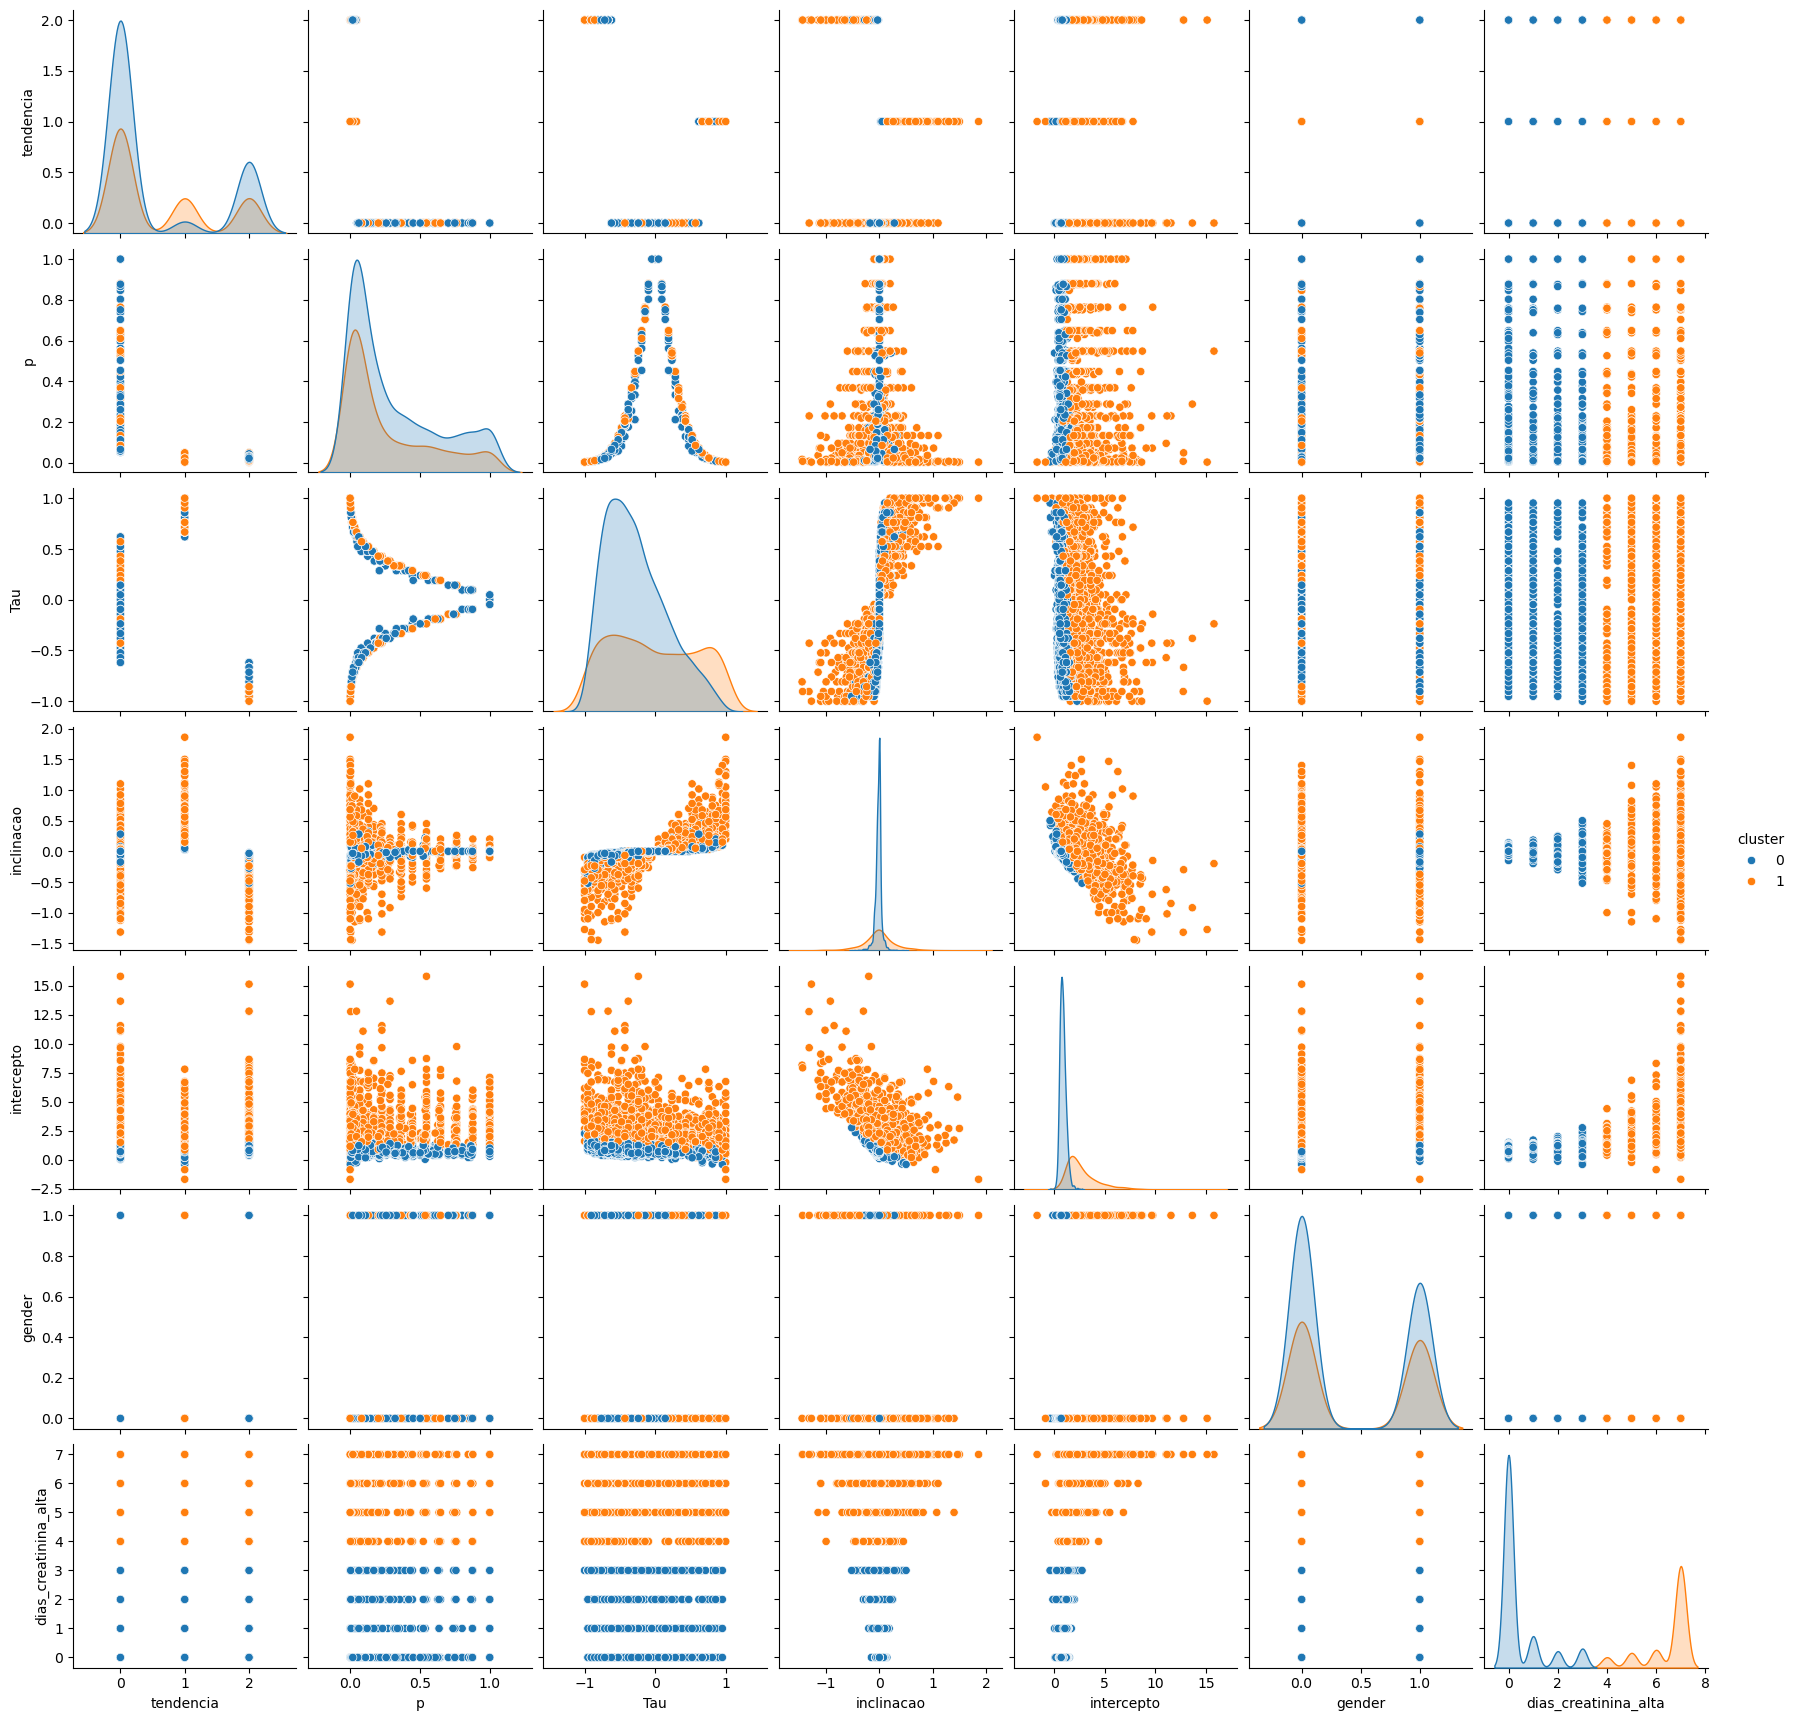

In [22]:
df_temp = df_creatinina.copy()
df_temp["cluster"] = y_creatinina

plt.figure(figsize = (12, 9))

sns.pairplot(df_temp, hue = "cluster")

plt.show()

### KMeans

#### Hiper-parâmetros para testes com o GridSearchCV

In [23]:
parametros_grid_search = {
    "n_clusters": [i for i in range(2, 14)],
    "init": ["k-means++", "random"],
    "n_init": [1, 2, 3, 4, 5, "auto"],
    "max_iter": [j for j in range(300, 1000, 100)],
    "algorithm": ["lloyd", "elkan"],
}

#### DATASET ureia

#### Teste com o GridSearchCV

In [24]:
grid_search = GridSearchCV(estimator = KMeans(),
                           param_grid = parametros_grid_search,
                           cv = 5,
                           n_jobs = -1)
grid_search.fit(df_ureia)

print(grid_search.best_estimator_)
print(grid_search.best_score_)
print(grid_search.best_index_)

KMeans(algorithm='elkan', max_iter=700, n_clusters=13, n_init=3)
-15351.222097039426
1148


#### Criando modelo a partir do GridSearchCV

In [25]:
kmeans_ureia = KMeans(n_clusters = 13,
                      max_iter = 500,
                      n_init = 3,
                      algorithm = "lloyd")
y_ureia = kmeans_ureia.fit_predict(df_ureia)

#### Testando modelo do GridSearchCV

In [26]:
silhouette:list[float] = []

for metrica in lista_metricas_silhueta:
    silhouette.append(silhouette_score(df_ureia, y_ureia, metric = metrica))

davies_bouldin:float = davies_bouldin_score(df_ureia, y_ureia)
calinski_harabasz:float = calinski_harabasz_score(df_ureia, y_ureia)

print("SILHOUETTE SCORE: ", silhouette, end = "\n")
print("DAVIS-BOULDIN SCORE: ", davies_bouldin, end = "\n")
print("CALINSKI-HARABASZ SCORE: ", calinski_harabasz, end = "\n")

SILHOUETTE SCORE:  [0.31189975879875853, -0.28452649677569325, 0.3611623424528228, 0.31189975879875853, 0.3611623424528228, 0.31189975879875853]
DAVIS-BOULDIN SCORE:  0.8839895716413783
CALINSKI-HARABASZ SCORE:  6396.962758636228


#### Teste com Método do Joelho

Este teste irá levar em consideração alguns dos parâmetros retornados como ótimos pelo GridSearchCV

In [27]:
soma_dos_quadrados_ureia:list[float] = []

for i in range(1, 20):
    kmeans_ureia = KMeans(n_clusters = i,
                          init = "k-means++",
                          n_init = 3,
                          max_iter = 500,
                          tol = 0.0004,
                          random_state = 42,
                          algorithm = "lloyd")
    kmeans_ureia.fit(df_ureia)
    soma_dos_quadrados_ureia.append(kmeans_ureia.inertia_)

#### Imprimindo o resultado do Método do Joelho 

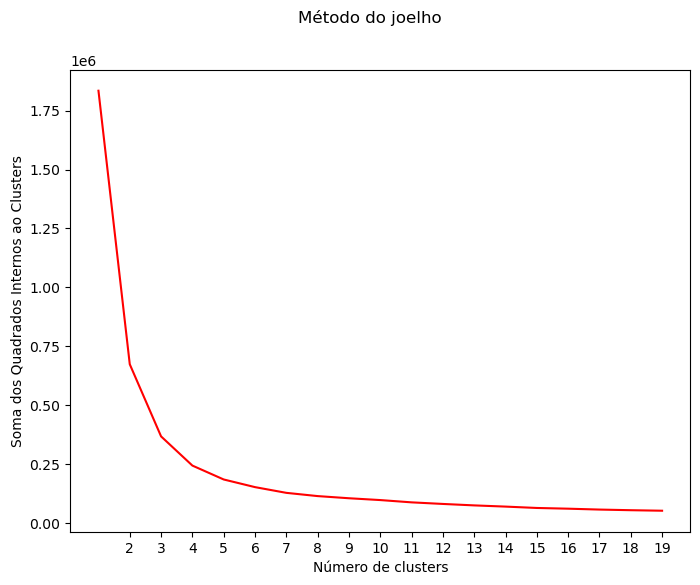

In [28]:
plt.figure(figsize = (8, 6))

plt.suptitle("Método do joelho")
plt.xlabel("Número de clusters")
plt.ylabel("Soma dos Quadrados Internos ao Clusters")

plt.plot(range(1, 20), soma_dos_quadrados_ureia, color = "red")
plt.xticks(np.arange(2, 20, step = 1))
plt.show()

No gráfico acima, é possível notar 3 joelhos:
- `X = 2`;
- `X = 3`;
- `X = 4`.

Abaixo, vamos testar a qualidade de cada um destes joelhos.

In [29]:
lista_joelhos_percebidos:list[int] = [2, 3, 4]
lista_modelos_kmeans:list[KMeans] = []

for i in lista_joelhos_percebidos:
    kmeans_ureia = KMeans(n_clusters = i,
                          init = "k-means++",
                          n_init = 3,
                          max_iter = 500,
                          tol = 0.00001,
                          random_state = 42,
                          algorithm = "lloyd")

    lista_modelos_kmeans.append(kmeans_ureia.fit(df_ureia))

for modelo, joelho in zip(lista_modelos_kmeans, lista_joelhos_percebidos):
    silhouette:list[float] = []
    y_ureia:list[float] = modelo.predict(df_ureia)

    for metrica in lista_metricas_silhueta:
        silhouette.append(silhouette_score(df_ureia, y_ureia, metric = metrica))

    davies_bouldin:float = davies_bouldin_score(df_ureia, y_ureia)
    calinski_harabasz:float = calinski_harabasz_score(df_ureia, y_ureia)

    print(f"Para {joelho} joelhos:", end = "\n")
    print("=" * 20, end = "\n")
    print("SILHOUETTE SCORE: ", silhouette, end = "\n")
    print("DAVIS-BOULDIN SCORE: ", davies_bouldin, end = "\n")
    print("CALINSKI-HARABASZ SCORE: ", calinski_harabasz, end = "\n")
    print("Inércia: %.3f" % modelo.inertia_, end = "\n")
    print("=" * 20, end = "\n\n\n")

Para 2 joelhos:
SILHOUETTE SCORE:  [0.6244557633003711, -0.251398699676212, 0.6560046774662056, 0.6244557633003711, 0.6560046774662056, 0.6244557633003711]
DAVIS-BOULDIN SCORE:  0.6003762153116484
CALINSKI-HARABASZ SCORE:  5606.062250997897
Inércia: 674074.457


Para 3 joelhos:
SILHOUETTE SCORE:  [0.5459962833462019, -0.4247979310453948, 0.5902046659789539, 0.5459962833462019, 0.5902046659789539, 0.5459962833462019]
DAVIS-BOULDIN SCORE:  0.6070836567121017
CALINSKI-HARABASZ SCORE:  6485.730657513332
Inércia: 368050.766


Para 4 joelhos:
SILHOUETTE SCORE:  [0.4626678976206612, -0.44161764434594863, 0.5154909691017066, 0.4626678976206612, 0.5154909691017066, 0.4626678976206612]
DAVIS-BOULDIN SCORE:  0.6515096837586591
CALINSKI-HARABASZ SCORE:  7062.47845092167
Inércia: 244275.792




Como é possível ver acima, o melhor resultado é com 2 grupos.

O resultado obtido utilizando o Método do Joelho foi melhor que o resultado obtido utilizando os parâmetros do GridSearchCV.

Além disso, o resultado do teste do joelho é diferente do resultado do algoritmo MeanShift. Enquanto o MeanShift retornou 4 grupos formados, aqui, com o Método de Joelho, temos 2 grupos formados. Temos que testar com a quantidade de clusteres do MeanShift para atestar qual é o melhor resultado.

#### Criando modelo à partir do resultado do algoritmo MeanShift

In [59]:
kmeans_ureia = KMeans(n_clusters = 4,
                      init = "k-means++",
                      n_init = 3,
                      max_iter = 500,
                      tol = 0.00001,
                      random_state = 42,
                      algorithm = "lloyd")

y_ureia = kmeans_ureia.fit_predict(df_ureia)

#### Testando modelo baseado no MeanShift

In [60]:
silhouette:list[float] = []

for metrica in lista_metricas_silhueta:
    silhouette.append(silhouette_score(df_ureia, y_ureia, metric = metrica))

davies_bouldin:float = davies_bouldin_score(df_ureia, y_ureia)
calinski_harabasz:float = calinski_harabasz_score(df_ureia, y_ureia)

print("SILHOUETTE SCORE: ", silhouette, end = "\n")
print("DAVIS-BOULDIN SCORE: ", davies_bouldin, end = "\n")
print("CALINSKI-HARABASZ SCORE: ", calinski_harabasz, end = "\n")

SILHOUETTE SCORE:  [0.4626678976206612, -0.44161764434594863, 0.5154909691017066, 0.4626678976206612, 0.5154909691017066, 0.4626678976206612]
DAVIS-BOULDIN SCORE:  0.6515096837586591
CALINSKI-HARABASZ SCORE:  7062.47845092167


Temos então que, de fato, o resultado obtido via Método do Joelho, com 2 grupos, é melhor que o resultado obtido acima, utilizando o resultado do agrupamento do algoritmo MeanShift. Será continuado o resultado do Método do Joelho.

#### Criando modelo final - seguindo o Método do Joelho 

In [61]:
kmeans_ureia = KMeans(n_clusters = 2,
                      init = "k-means++",
                      n_init = 3,
                      max_iter = 500,
                      tol = 0.00001,
                      random_state = 42,
                      algorithm = "lloyd")

y_ureia = kmeans_ureia.fit_predict(df_ureia)

#### Imprimindo o resultado final

<Figure size 1200x900 with 0 Axes>

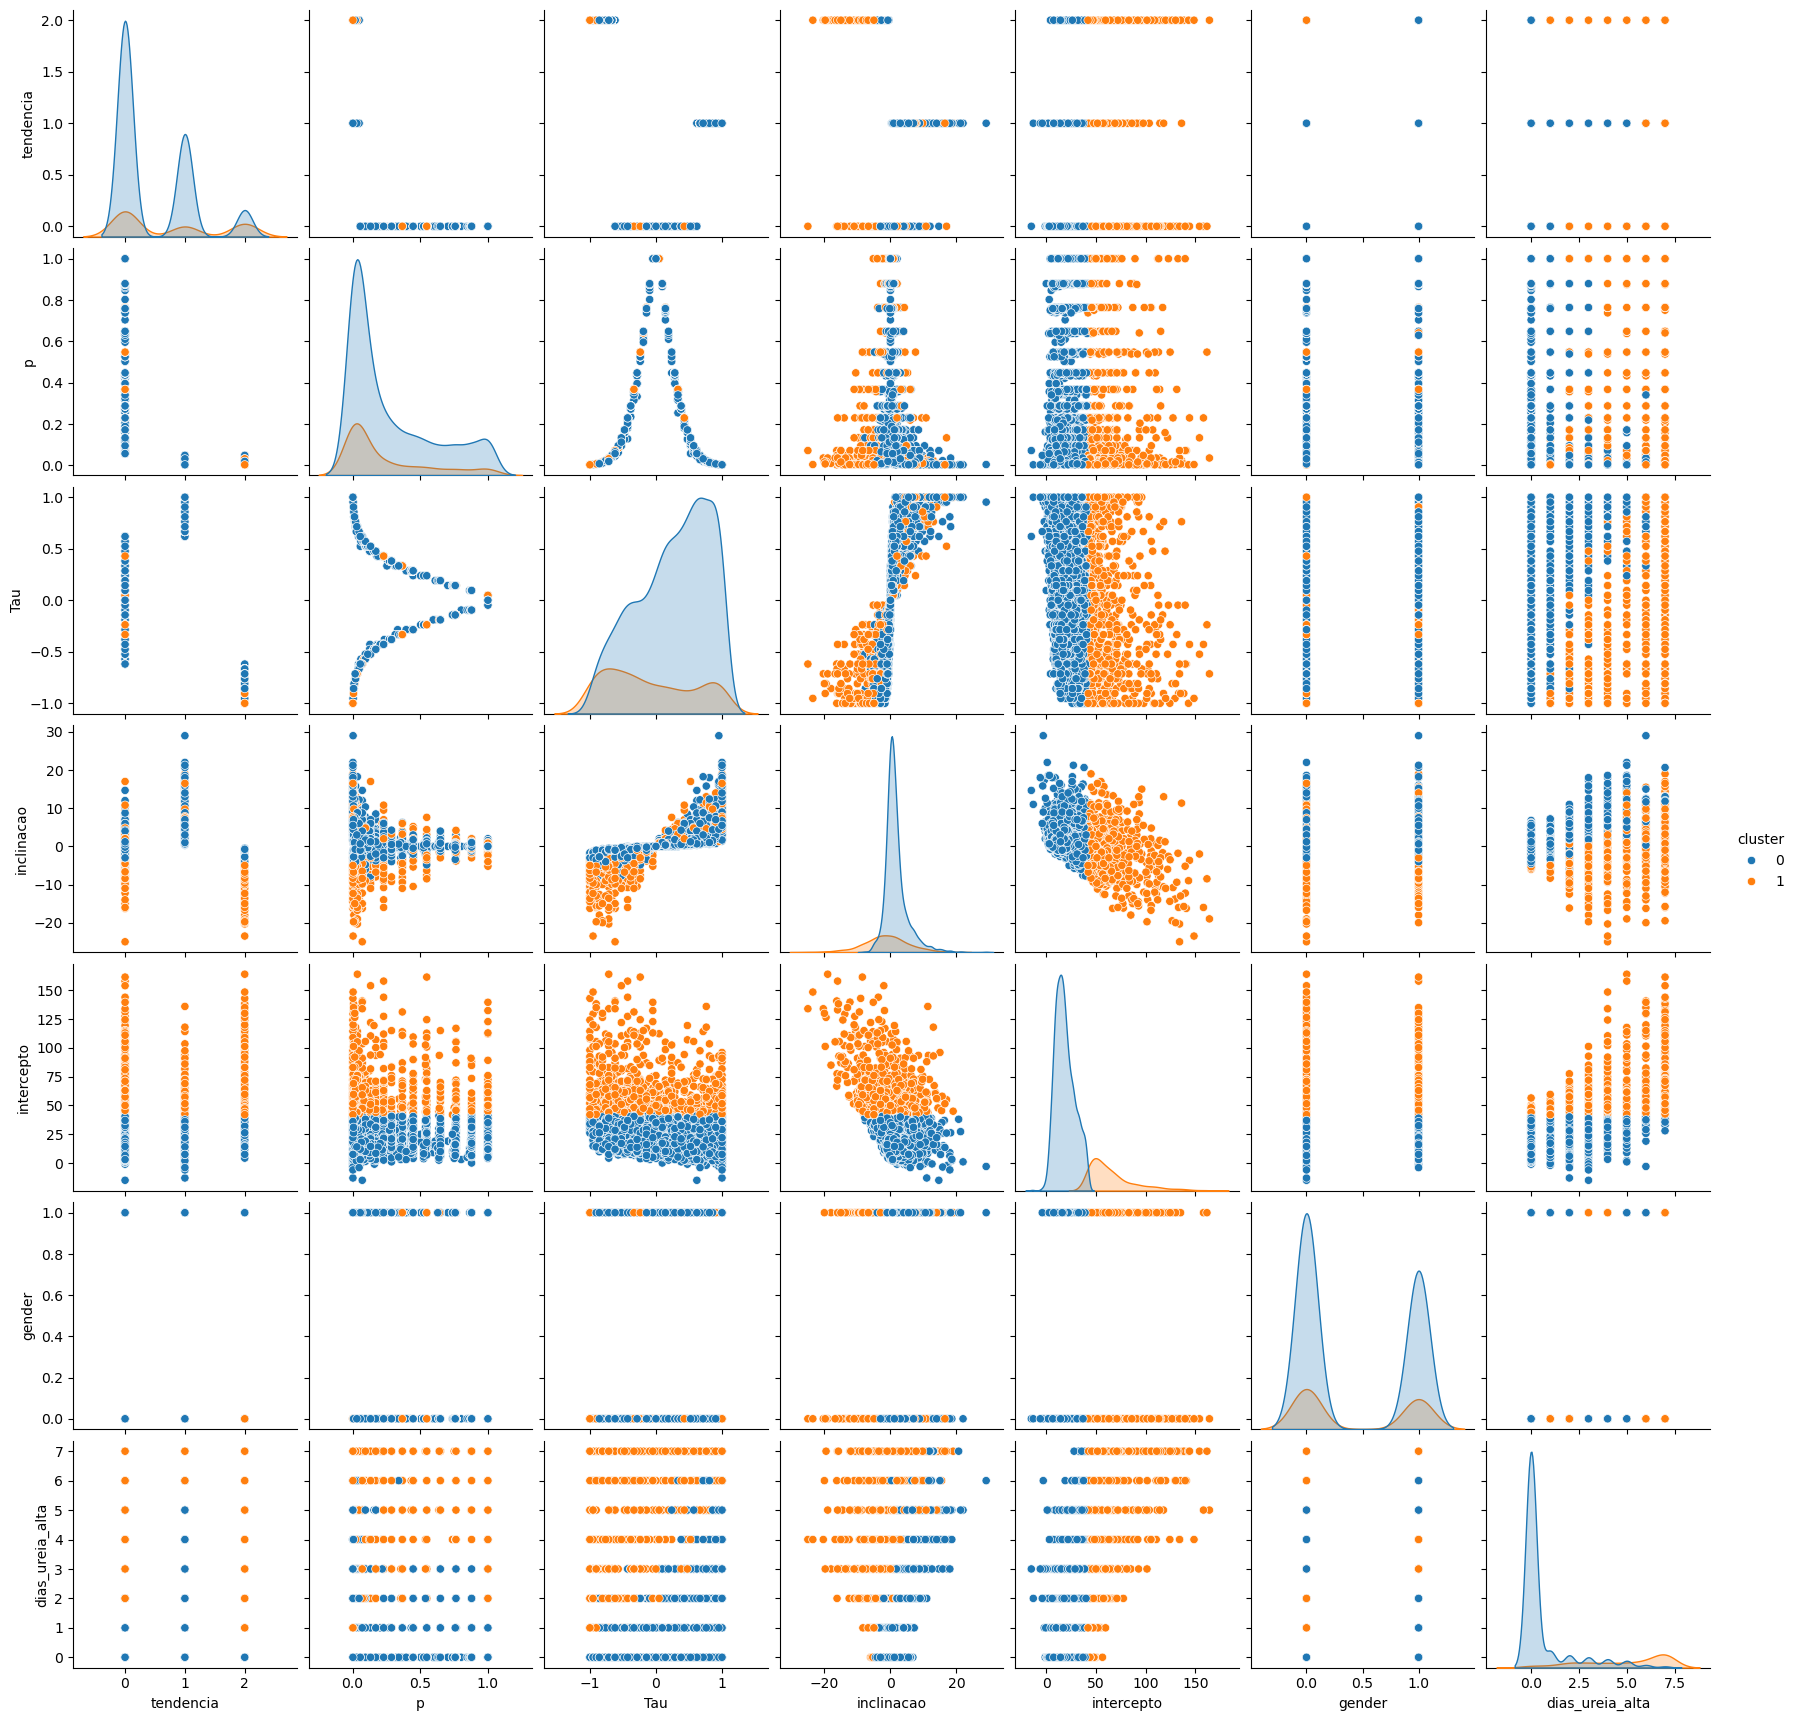

In [63]:
df_temp = df_ureia.copy()
df_temp["cluster"] = y_ureia

plt.figure(figsize = (12, 9))

sns.pairplot(df_temp, hue = "cluster")

plt.show()

#### DATASET creatinina

#### Teste com o GridSearchCV

In [64]:
grid_search = GridSearchCV(estimator = KMeans(),
                           param_grid = parametros_grid_search,
                           cv = 5,
                           n_jobs = -1)
grid_search.fit(df_creatinina)

print(grid_search.best_estimator_)
print(grid_search.best_score_)
print(grid_search.best_index_)

KMeans(max_iter=900, n_clusters=13, n_init=4)
-521.7191666805453
429


#### Criando modelo a partir do GridSearchCV

In [66]:
kmeans_creatinina = KMeans(n_clusters = 13,
                           max_iter = 700,
                           n_init = 4,
                           algorithm = "lloyd")
y_creatinina = kmeans_creatinina.fit_predict(df_creatinina)

#### Testando modelo do GridSearchCV

In [67]:
silhouette:list[float] = []

for metrica in lista_metricas_silhueta:
    silhouette.append(silhouette_score(df_creatinina, y_creatinina, metric = metrica))

davies_bouldin:float = davies_bouldin_score(df_creatinina, y_creatinina)
calinski_harabasz:float = calinski_harabasz_score(df_creatinina, y_creatinina)

print("SILHOUETTE SCORE: ", silhouette, end = "\n")
print("DAVIS-BOULDIN SCORE: ", davies_bouldin, end = "\n")
print("CALINSKI-HARABASZ SCORE: ", calinski_harabasz, end = "\n")

SILHOUETTE SCORE:  [0.40375576911614214, 0.32234696882730285, 0.38418504647522883, 0.40375576911614214, 0.38418504647522883, 0.40375576911614214]
DAVIS-BOULDIN SCORE:  1.0393743949111636
CALINSKI-HARABASZ SCORE:  4014.9046176096444


#### Teste com Método do Joelho

Este teste irá levar em consideração alguns dos parâmetros retornados como ótimos pelo GridSearchCV

In [68]:
soma_dos_quadrados_creatinina:list[float] = []

for i in range(1, 20):
    kmeans_creatinina = KMeans(n_clusters = i,
                          init = "k-means++",
                          n_init = 4,
                          max_iter = 500,
                          tol = 0.0004,
                          random_state = 42,
                          algorithm = "lloyd")
    kmeans_creatinina.fit(df_creatinina)
    soma_dos_quadrados_creatinina.append(kmeans_creatinina.inertia_)

#### Imprimindo o resultado do Método do Joelho 

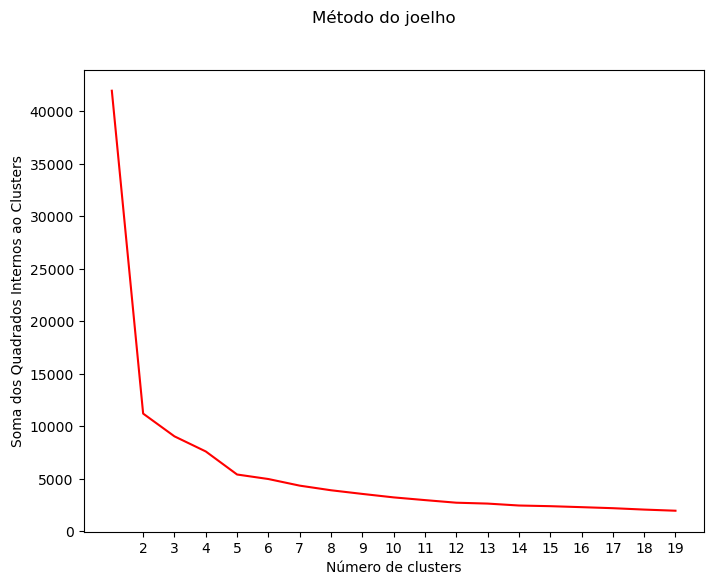

In [69]:
plt.figure(figsize = (8, 6))

plt.suptitle("Método do joelho")
plt.xlabel("Número de clusters")
plt.ylabel("Soma dos Quadrados Internos ao Clusters")

plt.plot(range(1, 20), soma_dos_quadrados_creatinina, color = "red")
plt.xticks(np.arange(2, 20, step = 1))
plt.show()

No gráfico acima, é possível notar 4 joelhos:
- `X = 2`;
- `X = 3`;
- `X = 5`;
- `X = 12`.

Abaixo, vamos testar a qualidade de cada um destes joelhos.

In [70]:
lista_joelhos_percebidos:list[int] = [2, 3, 5, 12]
lista_modelos_kmeans:list[KMeans] = []

for i in lista_joelhos_percebidos:
    kmeans_creatinina = KMeans(n_clusters = i,
                                       init = "k-means++",
                                       n_init = 4,
                                       max_iter = 500,
                                       tol = 0.00001,
                                       random_state = 42,
                                       algorithm = "lloyd")

    lista_modelos_kmeans.append(kmeans_creatinina.fit(df_creatinina))

for modelo, joelho in zip(lista_modelos_kmeans, lista_joelhos_percebidos):
    silhouette:list[float] = []
    y_creatinina:list[float] = modelo.predict(df_creatinina)

    for metrica in lista_metricas_silhueta:
        silhouette.append(silhouette_score(df_creatinina, y_creatinina, metric = metrica))

    davies_bouldin:float = davies_bouldin_score(df_creatinina, y_creatinina)
    calinski_harabasz:float = calinski_harabasz_score(df_creatinina, y_creatinina)

    print(f"Para {joelho} joelhos:", end = "\n")
    print("=" * 20, end = "\n")
    print("SILHOUETTE SCORE: ", silhouette, end = "\n")
    print("DAVIS-BOULDIN SCORE: ", davies_bouldin, end = "\n")
    print("CALINSKI-HARABASZ SCORE: ", calinski_harabasz, end = "\n")
    print("Inércia: %.3f" % modelo.inertia_, end = "\n")
    print("=" * 20, end = "\n\n\n")

Para 2 joelhos:
SILHOUETTE SCORE:  [0.606392861456724, 0.4286614665269984, 0.6511862271894391, 0.606392861456724, 0.6511862271894391, 0.606392861456724]
DAVIS-BOULDIN SCORE:  0.5392401557542985
CALINSKI-HARABASZ SCORE:  8939.694914864593
Inércia: 11216.445


Para 3 joelhos:
SILHOUETTE SCORE:  [0.5307273790452218, 0.20499955892244984, 0.5809139310417334, 0.5307273790452218, 0.5809139310417334, 0.5307273790452218]
DAVIS-BOULDIN SCORE:  0.8338284167704568
CALINSKI-HARABASZ SCORE:  6286.969530901581
Inércia: 8639.914


Para 5 joelhos:
SILHOUETTE SCORE:  [0.4518453171182109, 0.3208007040925435, 0.46763354583607497, 0.4518453171182109, 0.46763354583607497, 0.4518453171182109]
DAVIS-BOULDIN SCORE:  0.8494129121875901
CALINSKI-HARABASZ SCORE:  5498.700496724732
Inércia: 5413.922


Para 12 joelhos:
SILHOUETTE SCORE:  [0.40757028347824387, 0.3387702924198804, 0.3865700111034911, 0.40757028347824387, 0.3865700111034911, 0.40757028347824387]
DAVIS-BOULDIN SCORE:  1.027857492240565
CALINSKI-HARABAS

Como é possível ver acima, o melhor resultado é com 2 grupos.

O resultado obtido utilizando o Método do Joelho foi melhor que o resultado obtido utilizando os parâmetros do GridSearchCV.

Além disso, o resultado do teste do joelho é semelhante ao resultado do algoritmo MeanShift, portanto este teste não será realizado.

#### Criando modelo final - seguindo o Método do Joelho 

In [73]:
kmeans_creatinina = KMeans(n_clusters = 2,
                           init = "k-means++",
                           n_init = 4,
                           max_iter = 500,
                           tol = 0.00001,
                           random_state = 42,
                           algorithm = "lloyd")

y_creatinina = kmeans_creatinina.fit_predict(df_creatinina)

#### Imprimindo o resultado final

<Figure size 1200x900 with 0 Axes>

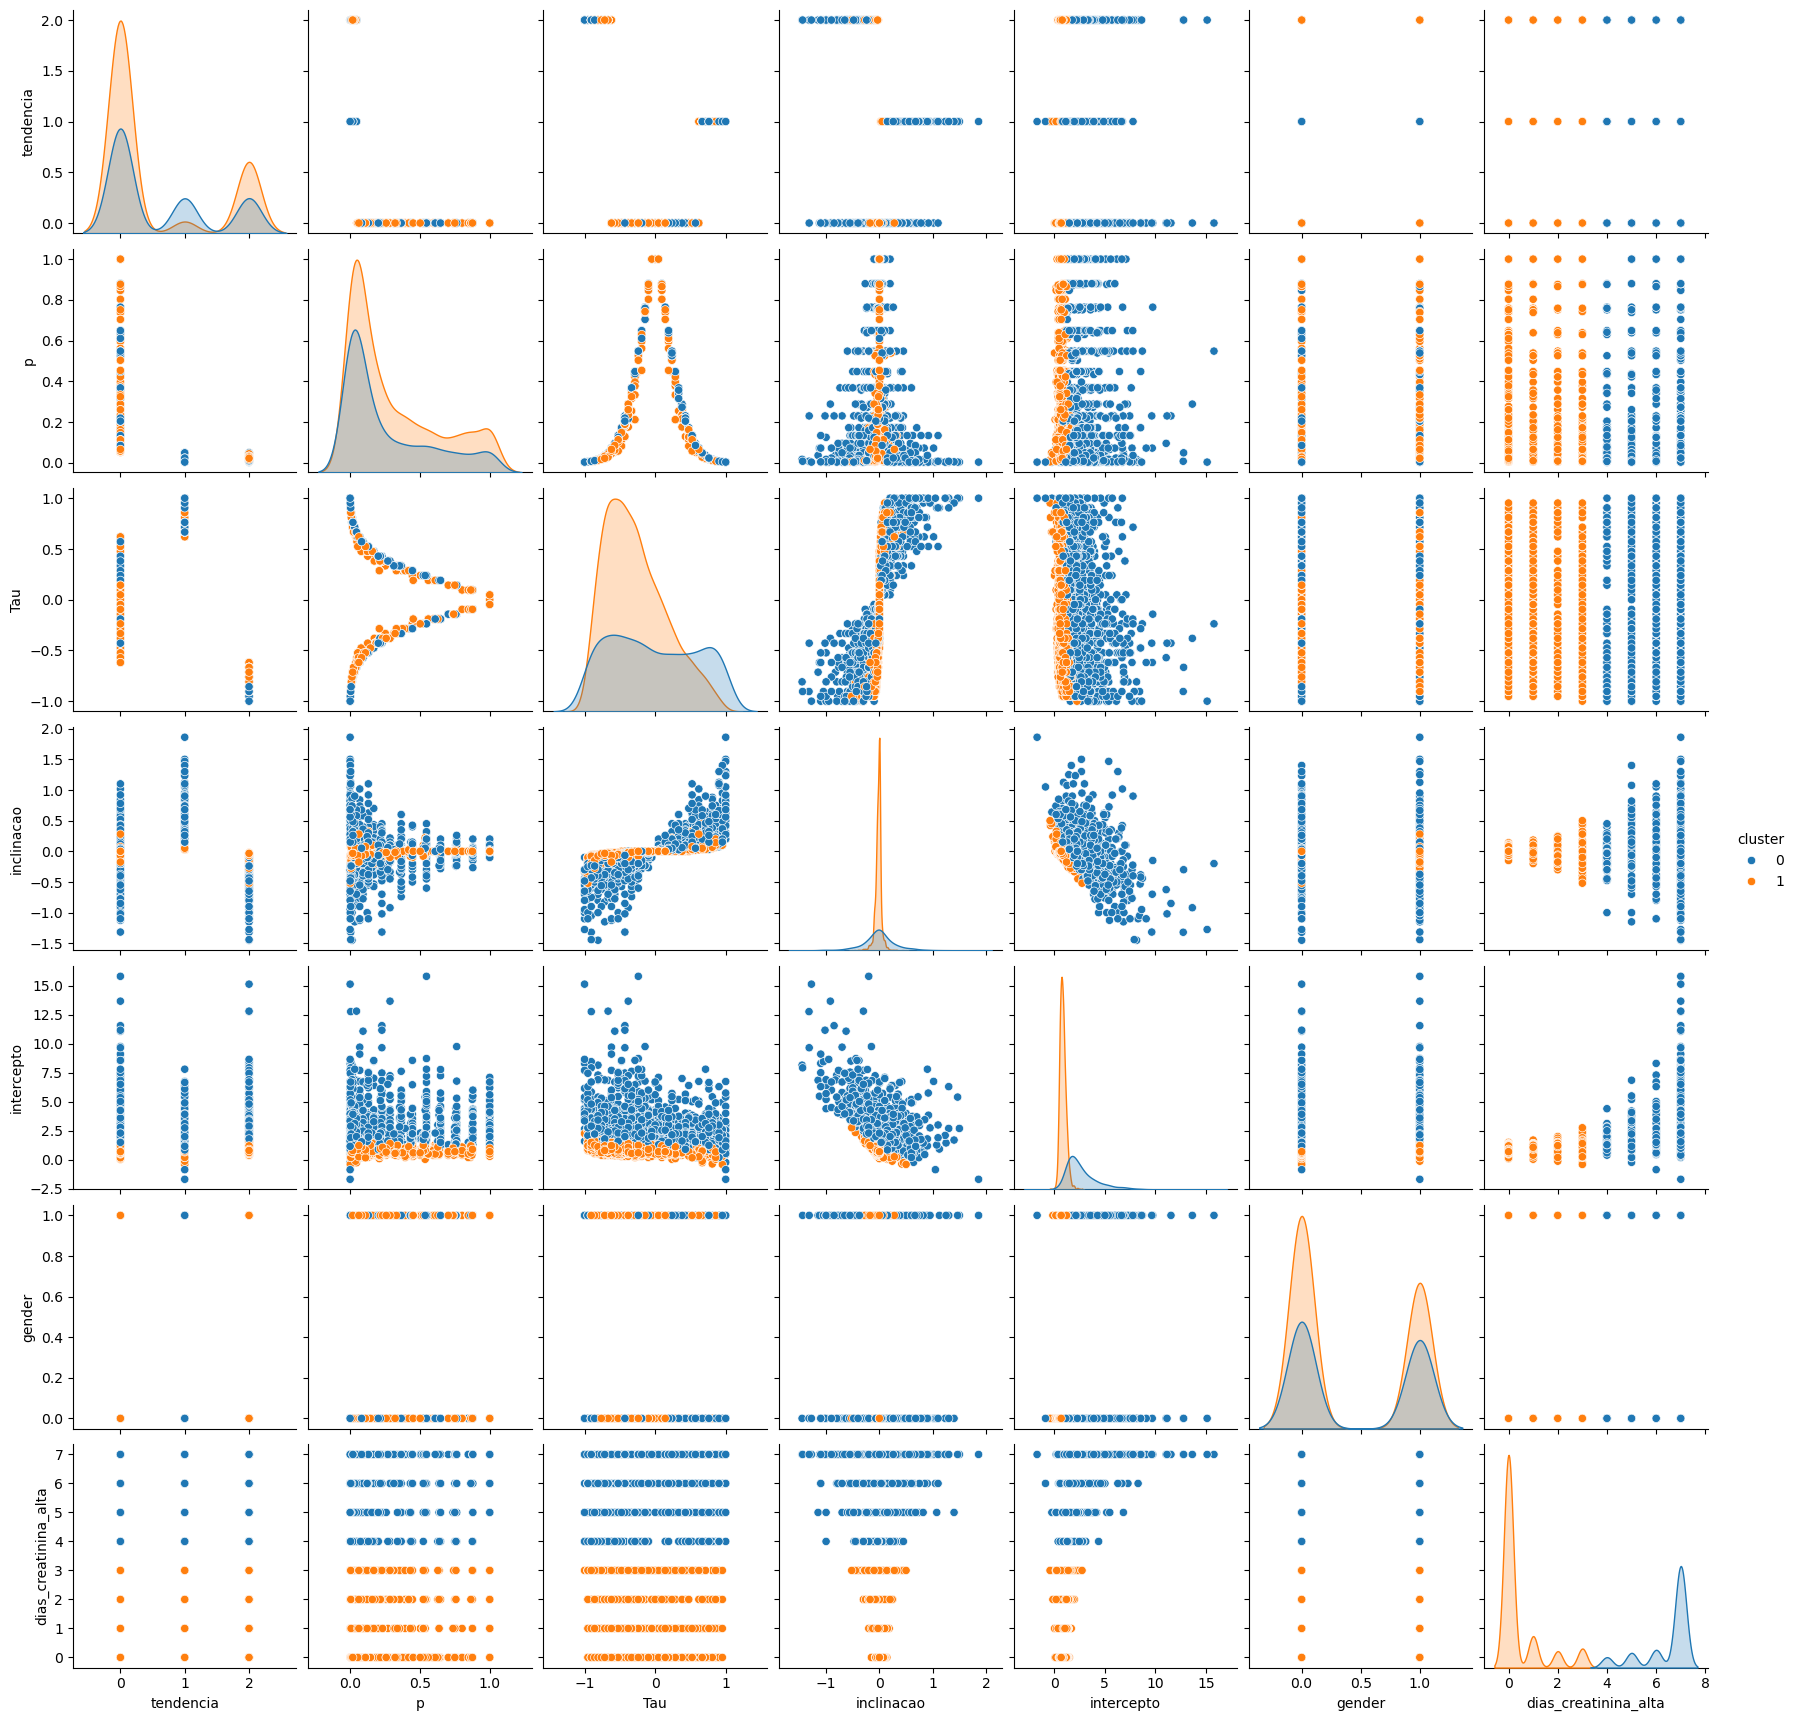

In [75]:
df_temp = df_creatinina.copy()
df_temp["cluster"] = y_creatinina

plt.figure(figsize = (12, 9))

sns.pairplot(df_temp, hue = "cluster")

plt.show()

### Fuzzy C-Means

#### Criando Hiper-parâmetros que serão usado por todos os datasets

In [12]:
lista_qtd_clusters = [i for i in range(1, 13)]
lista_parametros_fuzzy = [round(i, 1) for i in np.arange(1.1, 2.6, 0.1)]

texto_qtd_cluster:str = "Número de Clusters"
texto_coef_particionamento:str = "Coeficiente de Particionamento (CP)"
texto_coef_entropia:str = "Coeficiente de Entropia (CEP)"

#### DATASET ureia

##### Testes com a quantidade de clusteres

###### Distância - euclidean

In [13]:
modelos = []

for qtd_clusters in lista_qtd_clusters:
    fcmeans = FCM(n_clusters = qtd_clusters,
                  random_state = 42,
                  max_iter = 400,
                  distance = "euclidean",
                  m = 2.0)
    fcmeans.fit(df_ureia.values)
    modelos.append(fcmeans)

print(texto_qtd_cluster, "\t|", texto_coef_particionamento,"\t|", texto_coef_entropia)

for modelo, qtd_clusters in zip(modelos, lista_qtd_clusters):
    print("-" * (len(texto_qtd_cluster) + 5), "+",
          "-" * (len(texto_coef_particionamento) + 2), "+",
          "-" * (len(texto_coef_entropia) + 4), end = "\n")
    print("\t", qtd_clusters, "\t" * 2, end = "|\t\t")
    print(round(modelo.partition_coefficient, 3), "\t" * 3, end = "|\t\t")
    print(round(modelo.partition_entropy_coefficient, 3), end = "\n")

print("-" * (len(texto_qtd_cluster) + 5), "+",
      "-" * (len(texto_coef_particionamento) + 2), "+",
      "-" * (len(texto_coef_entropia) + 4), end = "\n")

Número de Clusters 	| Coeficiente de Particionamento (CP) 	| Coeficiente de Entropia (CEP)
----------------------- + ------------------------------------- + ---------------------------------
	 1 		|		1.0 			|		-0.0
----------------------- + ------------------------------------- + ---------------------------------
	 2 		|		0.437 			|		0.156
----------------------- + ------------------------------------- + ---------------------------------
	 3 		|		0.269 			|		0.17
----------------------- + ------------------------------------- + ---------------------------------
	 4 		|		0.184 			|		0.177
----------------------- + ------------------------------------- + ---------------------------------
	 5 		|		0.137 			|		0.175
----------------------- + ------------------------------------- + ---------------------------------
	 6 		|		0.107 			|		0.171
----------------------- + ------------------------------------- + ---------------------------------
	 7 		|		0.089 			|		0.157
----------------------- 

É possível ver que, no testes acima, o agrupamento em 1 único cluster obteve ótimos resultados. Porém será mantido 2 como quantidade de clusteres, pois ambos KMeans e MeanShift beneficiaram esta escolha.

No gráfico acima o de 2 centroides foi -> C.P. = 0.437 e C.E.P. = 0.156.

###### Distância - cosine

In [14]:
modelos = []

for qtd_clusters in lista_qtd_clusters:
    fcmeans = FCM(n_clusters = qtd_clusters,
                  random_state = 42,
                  max_iter = 400,
                  distance = "cosine",
                  m = 2.0)
    fcmeans.fit(df_ureia.values)
    modelos.append(fcmeans)

print(texto_qtd_cluster, "\t|", texto_coef_particionamento,"\t|", texto_coef_entropia)

for modelo, qtd_clusters in zip(modelos, lista_qtd_clusters):
    print("-" * (len(texto_qtd_cluster) + 5), "+",
          "-" * (len(texto_coef_particionamento) + 2), "+",
          "-" * (len(texto_coef_entropia) + 4), end = "\n")
    print("\t", qtd_clusters, "\t" * 2, end = "|\t\t")
    print(round(modelo.partition_coefficient, 3), "\t" * 3, end = "|\t\t")
    print(round(modelo.partition_entropy_coefficient, 3), end = "\n")

print("-" * (len(texto_qtd_cluster) + 5), "+",
      "-" * (len(texto_coef_particionamento) + 2), "+",
      "-" * (len(texto_coef_entropia) + 4), end = "\n")

Número de Clusters 	| Coeficiente de Particionamento (CP) 	| Coeficiente de Entropia (CEP)
----------------------- + ------------------------------------- + ---------------------------------
	 1 		|		1.0 			|		-0.0
----------------------- + ------------------------------------- + ---------------------------------
	 2 		|		0.455 			|		0.11
----------------------- + ------------------------------------- + ---------------------------------
	 3 		|		0.287 			|		0.113
----------------------- + ------------------------------------- + ---------------------------------
	 4 		|		0.201 			|		0.124
----------------------- + ------------------------------------- + ---------------------------------
	 5 		|		0.154 			|		0.119
----------------------- + ------------------------------------- + ---------------------------------
	 6 		|		0.122 			|		0.123
----------------------- + ------------------------------------- + ---------------------------------
	 7 		|		0.103 			|		0.11
----------------------- +

É possível ver que, no testes acima, o agrupamento em 1 único cluster obteve ótimos resultados. Porém será mantido 2 como quantidade de clusteres, pois ambos KMeans e MeanShift beneficiaram esta escolha.

No gráfico acima o de 2 centroides foi -> C.P. = 0,455 e C.E.P. = 0,110. Resultado melhor que a distância euclidiana.

###### Distância - minkowski - p = 1

In [15]:
modelos = []

for qtd_clusters in lista_qtd_clusters:
    fcmeans = FCM(n_clusters = qtd_clusters,
                  random_state = 42,
                  max_iter = 400,
                  distance = "minkowski",
                  m = 2.0,
                  distance_params = {"p": 1.0})
    fcmeans.fit(df_ureia.values)
    modelos.append(fcmeans)
    
print(texto_qtd_cluster, "\t|", texto_coef_particionamento,"\t|", texto_coef_entropia)

for modelo, qtd_clusters in zip(modelos, lista_qtd_clusters):
    print("-" * (len(texto_qtd_cluster) + 5), "+",
          "-" * (len(texto_coef_particionamento) + 2), "+",
          "-" * (len(texto_coef_entropia) + 4), end = "\n")
    print("\t", qtd_clusters, "\t" * 2, end = "|\t\t")
    print(round(modelo.partition_coefficient, 3), "\t" * 3, end = "|\t\t")
    print(round(modelo.partition_entropy_coefficient, 3), end = "\n")

print("-" * (len(texto_qtd_cluster) + 5), "+",
      "-" * (len(texto_coef_particionamento) + 2), "+",
      "-" * (len(texto_coef_entropia) + 4), end = "\n")

Número de Clusters 	| Coeficiente de Particionamento (CP) 	| Coeficiente de Entropia (CEP)
----------------------- + ------------------------------------- + ---------------------------------
	 1 		|		1.0 			|		-0.0
----------------------- + ------------------------------------- + ---------------------------------
	 2 		|		0.443 			|		0.141
----------------------- + ------------------------------------- + ---------------------------------
	 3 		|		0.276 			|		0.151
----------------------- + ------------------------------------- + ---------------------------------
	 4 		|		0.199 			|		0.138
----------------------- + ------------------------------------- + ---------------------------------
	 5 		|		0.153 			|		0.13
----------------------- + ------------------------------------- + ---------------------------------
	 6 		|		0.125 			|		0.12
----------------------- + ------------------------------------- + ---------------------------------
	 7 		|		0.105 			|		0.11
----------------------- + 

É possível ver que, no testes acima, o agrupamento em 1 único cluster obteve ótimos resultados. Porém será mantido 2 como quantidade de clusteres, pois ambos KMeans e MeanShift beneficiaram esta escolha.

No gráfico acima o de 2 centroides foi -> C.P. = 0,443 e C.E.P. = 0,141. Resultado pior que a distância euclidiana.

###### Distância - minkowski - p = 2

In [16]:
modelos = []

for qtd_clusters in lista_qtd_clusters:
    fcmeans = FCM(n_clusters = qtd_clusters,
                  random_state = 42,
                  max_iter = 400,
                  distance = "minkowski",
                  m = 2.0,
                  distance_params = {"p": 2.0})
    fcmeans.fit(df_ureia.values)
    modelos.append(fcmeans)
    
print(texto_qtd_cluster, "\t|", texto_coef_particionamento,"\t|", texto_coef_entropia)

for modelo, qtd_clusters in zip(modelos, lista_qtd_clusters):
    print("-" * (len(texto_qtd_cluster) + 5), "+",
          "-" * (len(texto_coef_particionamento) + 2), "+",
          "-" * (len(texto_coef_entropia) + 4), end = "\n")
    print("\t", qtd_clusters, "\t" * 2, end = "|\t\t")
    print(round(modelo.partition_coefficient, 3), "\t" * 3, end = "|\t\t")
    print(round(modelo.partition_entropy_coefficient, 3), end = "\n")

print("-" * (len(texto_qtd_cluster) + 5), "+",
      "-" * (len(texto_coef_particionamento) + 2), "+",
      "-" * (len(texto_coef_entropia) + 4), end = "\n")

Número de Clusters 	| Coeficiente de Particionamento (CP) 	| Coeficiente de Entropia (CEP)
----------------------- + ------------------------------------- + ---------------------------------
	 1 		|		1.0 			|		-0.0
----------------------- + ------------------------------------- + ---------------------------------
	 2 		|		0.437 			|		0.156
----------------------- + ------------------------------------- + ---------------------------------
	 3 		|		0.269 			|		0.17
----------------------- + ------------------------------------- + ---------------------------------
	 4 		|		0.184 			|		0.177
----------------------- + ------------------------------------- + ---------------------------------
	 5 		|		0.137 			|		0.175
----------------------- + ------------------------------------- + ---------------------------------
	 6 		|		0.107 			|		0.171
----------------------- + ------------------------------------- + ---------------------------------
	 7 		|		0.089 			|		0.157
----------------------- 

É possível ver que, no testes acima, o agrupamento em 1 único cluster obteve ótimos resultados. Porém será mantido 2 como quantidade de clusteres, pois ambos KMeans e MeanShift beneficiaram esta escolha.

No gráfico acima o de 2 centroides foi -> C.P. = 0,437 e C.E.P. = 0,156. Resultado pior que com p = 1.

Das três distâncias, a melhor foi "cosine".

Ela será utilizada nos próximos testes e as outras distâncias serão descartadas.

##### Testes com diferentes valores do parâmetro Fuzzy (*p*)

In [17]:
modelos = []

for parametro_fuzzy in lista_parametros_fuzzy:
    fcmeans = FCM(n_clusters = 2,
                  random_state = 42,
                  max_iter = 400,
                  distance = "cosine",
                  m = parametro_fuzzy)
    fcmeans.fit(df_ureia.values)
    modelos.append(fcmeans)
    
print(texto_qtd_cluster, "\t|", texto_coef_particionamento,"\t|", texto_coef_entropia)

for modelo, qtd_clusters in zip(modelos, lista_qtd_clusters):
    print("-" * (len(texto_qtd_cluster) + 5), "+",
          "-" * (len(texto_coef_particionamento) + 2), "+",
          "-" * (len(texto_coef_entropia) + 4), end = "\n")
    print("\t", qtd_clusters, "\t" * 2, end = "|\t\t")
    print(round(modelo.partition_coefficient, 3), "\t" * 3, end = "|\t\t")
    print(round(modelo.partition_entropy_coefficient, 3), end = "\n")

print("-" * (len(texto_qtd_cluster) + 5), "+",
      "-" * (len(texto_coef_particionamento) + 2), "+",
      "-" * (len(texto_coef_entropia) + 4), end = "\n")

Número de Clusters 	| Coeficiente de Particionamento (CP) 	| Coeficiente de Entropia (CEP)
----------------------- + ------------------------------------- + ---------------------------------
	 1 		|		0.497 			|		0.007
----------------------- + ------------------------------------- + ---------------------------------
	 2 		|		0.494 			|		0.015
----------------------- + ------------------------------------- + ---------------------------------
	 3 		|		0.49 			|		0.025
----------------------- + ------------------------------------- + ---------------------------------
	 4 		|		0.486 			|		0.035
----------------------- + ------------------------------------- + ---------------------------------
	 5 		|		0.481 			|		0.046
----------------------- + ------------------------------------- + ---------------------------------
	 6 		|		0.476 			|		0.057
----------------------- + ------------------------------------- + ---------------------------------
	 7 		|		0.471 			|		0.07
----------------------

Como podemos vez acima, o melhor parâmetro fuzzy é `m = 1.1`, com com C.P. = 0.497 e C.E.P. = 0.001.

##### Testando modelo

In [18]:
fcmeans_ureia = FCM(n_clusters = 2,
                    random_state = 42,
                    max_iter = 400,
                    distance = "cosine",
                    m = 1.1)
fcmeans_ureia.fit(df_ureia.values)
y_ureia = fcmeans_ureia.predict(df_ureia.values)

###### Imprimindo resultado do modelo

In [19]:
silhouette:list[float] = []

for metrica in lista_metricas_silhueta:
    silhouette.append(silhouette_score(df_ureia, y_ureia, metric = metrica))

davies_bouldin:float = davies_bouldin_score(df_ureia, y_ureia)
calinski_harabasz:float = calinski_harabasz_score(df_ureia, y_ureia)

print("SILHOUETTE SCORE: ", silhouette, end = "\n")
print("DAVIS-BOULDIN SCORE: ", davies_bouldin, end = "\n")
print("CALINSKI-HARABASZ SCORE: ", calinski_harabasz, end = "\n")

SILHOUETTE SCORE:  [0.05480500457352799, 0.7196735428900439, -0.020026040495960136, 0.05480500457352799, -0.020026040495960136, 0.05480500457352799]
DAVIS-BOULDIN SCORE:  1.853824725606024
CALINSKI-HARABASZ SCORE:  249.4050344989503


Temos que:
- Com a distância *cosine* a silhueta o algoritmo Fuzzy C-Means obteve: 0.7197;
- Davis-Bouldin: 1.8538;
- Calinski-Harabasz: 249.405.

O resultado do teste da silhueta foi bom, mas os outros testes apontaram uma acurária ruim.

#### DATASET creatinina

###### Distância - euclidean

In [20]:
modelos = []

for qtd_clusters in lista_qtd_clusters:
    fcmeans = FCM(n_clusters = qtd_clusters,
                  random_state = 42,
                  max_iter = 400,
                  distance = "euclidean",
                  m = 2.0)
    fcmeans.fit(df_creatinina.values)
    modelos.append(fcmeans)
    
print(texto_qtd_cluster, "\t|", texto_coef_particionamento,"\t|", texto_coef_entropia)

for modelo, qtd_clusters in zip(modelos, lista_qtd_clusters):
    print("-" * (len(texto_qtd_cluster) + 5), "+",
          "-" * (len(texto_coef_particionamento) + 2), "+",
          "-" * (len(texto_coef_entropia) + 4), end = "\n")
    print("\t", qtd_clusters, "\t" * 2, end = "|\t\t")
    print(round(modelo.partition_coefficient, 3), "\t" * 3, end = "|\t\t")
    print(round(modelo.partition_entropy_coefficient, 3), end = "\n")

print("-" * (len(texto_qtd_cluster) + 5), "+",
      "-" * (len(texto_coef_particionamento) + 2), "+",
      "-" * (len(texto_coef_entropia) + 4), end = "\n")

Número de Clusters 	| Coeficiente de Particionamento (CP) 	| Coeficiente de Entropia (CEP)
----------------------- + ------------------------------------- + ---------------------------------
	 1 		|		1.0 			|		-0.0
----------------------- + ------------------------------------- + ---------------------------------
	 2 		|		0.438 			|		0.161
----------------------- + ------------------------------------- + ---------------------------------
	 3 		|		0.246 			|		0.228
----------------------- + ------------------------------------- + ---------------------------------
	 4 		|		0.161 			|		0.24
----------------------- + ------------------------------------- + ---------------------------------
	 5 		|		0.123 			|		0.222
----------------------- + ------------------------------------- + ---------------------------------
	 6 		|		0.086 			|		0.231
----------------------- + ------------------------------------- + ---------------------------------
	 7 		|		0.071 			|		0.212
----------------------- 

É possível ver que, no testes acima, o agrupamento em 1 único cluster obteve ótimos resultados. Porém será mantido 2 como quantidade de clusteres, pois ambos KMeans e MeanShift beneficiaram esta escolha.

No gráfico acima o de 2 centroides foi -> C.P. = 0.438 e C.E.P. = 0.161.

###### Distância - cosine

In [21]:
modelos = []

for qtd_clusters in lista_qtd_clusters:
    fcmeans = FCM(n_clusters = qtd_clusters,
                  random_state = 42,
                  max_iter = 400,
                  distance = "cosine",
                  m = 2.0)
    fcmeans.fit(df_creatinina.values)
    modelos.append(fcmeans)
    
print(texto_qtd_cluster, "\t|", texto_coef_particionamento,"\t|", texto_coef_entropia)

for modelo, qtd_clusters in zip(modelos, lista_qtd_clusters):
    print("-" * (len(texto_qtd_cluster) + 5), "+",
          "-" * (len(texto_coef_particionamento) + 2), "+",
          "-" * (len(texto_coef_entropia) + 4), end = "\n")
    print("\t", qtd_clusters, "\t" * 2, end = "|\t\t")
    print(round(modelo.partition_coefficient, 3), "\t" * 3, end = "|\t\t")
    print(round(modelo.partition_entropy_coefficient, 3), end = "\n")

print("-" * (len(texto_qtd_cluster) + 5), "+",
      "-" * (len(texto_coef_particionamento) + 2), "+",
      "-" * (len(texto_coef_entropia) + 4), end = "\n")

Número de Clusters 	| Coeficiente de Particionamento (CP) 	| Coeficiente de Entropia (CEP)
----------------------- + ------------------------------------- + ---------------------------------
	 1 		|		1.0 			|		-0.0
----------------------- + ------------------------------------- + ---------------------------------
	 2 		|		0.427 			|		0.175
----------------------- + ------------------------------------- + ---------------------------------
	 3 		|		0.288 			|		0.126
----------------------- + ------------------------------------- + ---------------------------------
	 4 		|		0.188 			|		0.169
----------------------- + ------------------------------------- + ---------------------------------
	 5 		|		0.142 			|		0.17
----------------------- + ------------------------------------- + ---------------------------------
	 6 		|		0.131 			|		0.111
----------------------- + ------------------------------------- + ---------------------------------
	 7 		|		0.107 			|		0.114
----------------------- 

É possível ver que, no testes acima, o agrupamento em 1 único cluster obteve ótimos resultados. Porém será mantido 2 como quantidade de clusteres, pois ambos KMeans e MeanShift beneficiaram esta escolha.

No gráfico acima o de 2 centroides foi -> C.P. = 0,427 e C.E.P. = 0,175. Resultado pior que a distância euclidiana.

###### Distância - minkowski - p = 1

In [22]:
modelos = []

for qtd_clusters in lista_qtd_clusters:
    fcmeans = FCM(n_clusters = qtd_clusters,
                  random_state = 42,
                  max_iter = 400,
                  distance = "minkowski",
                  m = 2.0,
                  distance_params = {"p": 1.0})
    fcmeans.fit(df_creatinina.values)
    modelos.append(fcmeans)
    
print(texto_qtd_cluster, "\t|", texto_coef_particionamento,"\t|", texto_coef_entropia)

for modelo, qtd_clusters in zip(modelos, lista_qtd_clusters):
    print("-" * (len(texto_qtd_cluster) + 5), "+",
          "-" * (len(texto_coef_particionamento) + 2), "+",
          "-" * (len(texto_coef_entropia) + 4), end = "\n")
    print("\t", qtd_clusters, "\t" * 2, end = "|\t\t")
    print(round(modelo.partition_coefficient, 3), "\t" * 3, end = "|\t\t")
    print(round(modelo.partition_entropy_coefficient, 3), end = "\n")

print("-" * (len(texto_qtd_cluster) + 5), "+",
      "-" * (len(texto_coef_particionamento) + 2), "+",
      "-" * (len(texto_coef_entropia) + 4), end = "\n")

Número de Clusters 	| Coeficiente de Particionamento (CP) 	| Coeficiente de Entropia (CEP)
----------------------- + ------------------------------------- + ---------------------------------
	 1 		|		1.0 			|		-0.0
----------------------- + ------------------------------------- + ---------------------------------
	 2 		|		0.461 			|		0.1
----------------------- + ------------------------------------- + ---------------------------------
	 3 		|		0.283 			|		0.136
----------------------- + ------------------------------------- + ---------------------------------
	 4 		|		0.201 			|		0.135
----------------------- + ------------------------------------- + ---------------------------------
	 5 		|		0.152 			|		0.132
----------------------- + ------------------------------------- + ---------------------------------
	 6 		|		0.125 			|		0.118
----------------------- + ------------------------------------- + ---------------------------------
	 7 		|		0.105 			|		0.11
----------------------- + 

É possível ver que, no testes acima, o agrupamento em 1 único cluster obteve ótimos resultados. Porém será mantido 2 como quantidade de clusteres, pois ambos KMeans e MeanShift beneficiaram esta escolha.

No gráfico acima o de 2 centroides foi -> C.P. = 0,461 e C.E.P. = 0,100. Resultado melhor que a distância euclidiana.

###### Distância - minkowski - p = 2

In [23]:
modelos = []

for qtd_clusters in lista_qtd_clusters:
    fcmeans = FCM(n_clusters = qtd_clusters,
                  random_state = 42,
                  max_iter = 400,
                  distance = "minkowski",
                  m = 2.0,
                  distance_params = {"p": 2.0})
    fcmeans.fit(df_creatinina.values)
    modelos.append(fcmeans)
    
print(texto_qtd_cluster, "\t|", texto_coef_particionamento,"\t|", texto_coef_entropia)

for modelo, qtd_clusters in zip(modelos, lista_qtd_clusters):
    print("-" * (len(texto_qtd_cluster) + 5), "+",
          "-" * (len(texto_coef_particionamento) + 2), "+",
          "-" * (len(texto_coef_entropia) + 4), end = "\n")
    print("\t", qtd_clusters, "\t" * 2, end = "|\t\t")
    print(round(modelo.partition_coefficient, 3), "\t" * 3, end = "|\t\t")
    print(round(modelo.partition_entropy_coefficient, 3), end = "\n")

print("-" * (len(texto_qtd_cluster) + 5), "+",
      "-" * (len(texto_coef_particionamento) + 2), "+",
      "-" * (len(texto_coef_entropia) + 4), end = "\n")

Número de Clusters 	| Coeficiente de Particionamento (CP) 	| Coeficiente de Entropia (CEP)
----------------------- + ------------------------------------- + ---------------------------------
	 1 		|		1.0 			|		-0.0
----------------------- + ------------------------------------- + ---------------------------------
	 2 		|		0.438 			|		0.161
----------------------- + ------------------------------------- + ---------------------------------
	 3 		|		0.246 			|		0.228
----------------------- + ------------------------------------- + ---------------------------------
	 4 		|		0.161 			|		0.24
----------------------- + ------------------------------------- + ---------------------------------
	 5 		|		0.123 			|		0.222
----------------------- + ------------------------------------- + ---------------------------------
	 6 		|		0.086 			|		0.231
----------------------- + ------------------------------------- + ---------------------------------
	 7 		|		0.071 			|		0.212
----------------------- 

É possível ver que, no testes acima, o agrupamento em 1 único cluster obteve ótimos resultados. Porém será mantido 2 como quantidade de clusteres, pois ambos KMeans e MeanShift beneficiaram esta escolha.

No gráfico acima o de 2 centroides foi -> C.P. = 0,438 e C.E.P. = 0,161. Resultado pior que com p = 1.

Das três distâncias, a melhor foi "minkowski". Com o parâmetro *p* = 1.

Ela será utilizada nos próximos testes e as outras distâncias serão descartadas.

##### Testes com diferentes valores do parâmetro Fuzzy (*p*)

In [24]:
modelos = []

for parametro_fuzzy in lista_parametros_fuzzy:
    fcmeans = FCM(n_clusters = 2,
                  random_state = 42,
                  max_iter = 400,
                  distance = "minkowski",
                  m = parametro_fuzzy,
                  distance_params = {"p" : 1.0})
    fcmeans.fit(df_creatinina.values)
    modelos.append(fcmeans)
    
print(texto_qtd_cluster, "\t|", texto_coef_particionamento,"\t|", texto_coef_entropia)

for modelo, qtd_clusters in zip(modelos, lista_qtd_clusters):
    print("-" * (len(texto_qtd_cluster) + 5), "+",
          "-" * (len(texto_coef_particionamento) + 2), "+",
          "-" * (len(texto_coef_entropia) + 4), end = "\n")
    print("\t", qtd_clusters, "\t" * 2, end = "|\t\t")
    print(round(modelo.partition_coefficient, 3), "\t" * 3, end = "|\t\t")
    print(round(modelo.partition_entropy_coefficient, 3), end = "\n")

print("-" * (len(texto_qtd_cluster) + 5), "+",
      "-" * (len(texto_coef_particionamento) + 2), "+",
      "-" * (len(texto_coef_entropia) + 4), end = "\n")

/home/igorsantana/anaconda3/envs/.petca-venv/lib/python3.12/site-packages/fcmeans/main.py:94: RuntimeWarning: invalid value encountered in power
  temp = FCM._dist(


Número de Clusters 	| Coeficiente de Particionamento (CP) 	| Coeficiente de Entropia (CEP)
----------------------- + ------------------------------------- + ---------------------------------
	 1 		|		nan 			|		nan
----------------------- + ------------------------------------- + ---------------------------------
	 2 		|		nan 			|		nan
----------------------- + ------------------------------------- + ---------------------------------
	 3 		|		nan 			|		nan
----------------------- + ------------------------------------- + ---------------------------------
	 4 		|		nan 			|		nan
----------------------- + ------------------------------------- + ---------------------------------
	 5 		|		0.484 			|		0.038
----------------------- + ------------------------------------- + ---------------------------------
	 6 		|		nan 			|		nan
----------------------- + ------------------------------------- + ---------------------------------
	 7 		|		nan 			|		nan
----------------------- + ------------------

Como podemos vez acima, o melhor parâmetro fuzzy é `m = 1.5`, com com C.P. = 0.484 e C.E.P. = 0.038.

##### Testando modelo

In [25]:
fcmeans_creatinina = FCM(n_clusters = 2,
                         random_state = 42,
                         max_iter = 400,
                         distance = "minkowski",
                         m = 1.5,
                         distance_params = {"p" : 1.0})
fcmeans_creatinina.fit(df_creatinina.values)
y_creatinina = fcmeans_creatinina.predict(df_creatinina.values)

###### Imprimindo resultado do modelo

In [26]:
silhouette:list[float] = []

for metrica in lista_metricas_silhueta:
    silhouette.append(silhouette_score(df_creatinina, y_creatinina, metric = metrica))

davies_bouldin:float = davies_bouldin_score(df_creatinina, y_creatinina)
calinski_harabasz:float = calinski_harabasz_score(df_creatinina, y_creatinina)

print("SILHOUETTE SCORE: ", silhouette, end = "\n")
print("DAVIS-BOULDIN SCORE: ", davies_bouldin, end = "\n")
print("CALINSKI-HARABASZ SCORE: ", calinski_harabasz, end = "\n")

SILHOUETTE SCORE:  [0.6002031650326555, 0.41420387946238074, 0.6410969903730794, 0.6002031650326555, 0.6410969903730794, 0.6002031650326555]
DAVIS-BOULDIN SCORE:  0.5492791160338862
CALINSKI-HARABASZ SCORE:  8504.776176649833


Temos que:
- Com a distância *euclidean* a silhueta o algoritmo Fuzzy C-Means obteve: 0.6411;
- Davis-Bouldin: 0.5493;
- Calinski-Harabasz: 8504.77.

O resultado do teste da silhueta foi bom, mas um resultado é mais confiável quando o resultado de Davis-Bouldin é menor que 0.35.

### DBSCAN

#### Hiper-parâmetros que serão usado por todos os datasets

In [27]:
lista_de_epocas = [i for i in np.arange(0.2, 1.5, 0.1)]
lista_peso_minimo = [i for i in range(2, 21)]
lista_tamanho_folha = [i for i in range(20, 60, 10)]
lista_parametro_minkowski = [1.0, 2.0, 4.0]
lista_metrica = ["cityblock", "cosine", "euclidean", "l1", "l2", "manhattan"]
lista_algoritmo = ["auto", "ball_tree", "kd_tree", "brute"]

#### DATASET ureia

#### Testes com iteração por laço `for` utilizando diferentes parâmetros

##### Diferentes quantidades de epoocas

In [28]:
modelos = []

for nro_epocas in lista_de_epocas:
    dbscan = DBSCAN(eps = nro_epocas,
                    n_jobs = -1)
    dbscan.fit(df_ureia)
    modelos.append(dbscan)
    
for modelo in modelos:
    y_dbscan = abs(modelo.labels_)
    qtd_clusters_ = len(set(y_dbscan)) - (1 if -1 in y_dbscan else 0)
    nro_ruidos_ = list(y_dbscan).count(-1)

    print("Modelo com época = ", round(modelo.eps, 1))
    print("=" * 30)
    print("Número estimado  de clusteres: %d" % qtd_clusters_)
    print("Número estimado de pontos considerados ruídos: %d" % nro_ruidos_)
    print("=" * 30, end = "\n\n\n")

Modelo com época =  0.2
Número estimado  de clusteres: 19
Número estimado de pontos considerados ruídos: 0


Modelo com época =  0.3
Número estimado  de clusteres: 26
Número estimado de pontos considerados ruídos: 0


Modelo com época =  0.4
Número estimado  de clusteres: 64
Número estimado de pontos considerados ruídos: 0


Modelo com época =  0.5
Número estimado  de clusteres: 52
Número estimado de pontos considerados ruídos: 0


Modelo com época =  0.6
Número estimado  de clusteres: 40
Número estimado de pontos considerados ruídos: 0


Modelo com época =  0.7
Número estimado  de clusteres: 40
Número estimado de pontos considerados ruídos: 0


Modelo com época =  0.8
Número estimado  de clusteres: 33
Número estimado de pontos considerados ruídos: 0


Modelo com época =  0.9
Número estimado  de clusteres: 29
Número estimado de pontos considerados ruídos: 0


Modelo com época =  1.0
Número estimado  de clusteres: 19
Número estimado de pontos considerados ruídos: 0


Modelo com época = 

##### Diferentes valores de peso mínimo

In [29]:
modelos = []

for peso_minimo in lista_peso_minimo:
    dbscan = DBSCAN(eps = 1.1,
                    min_samples = peso_minimo,
                    n_jobs = -1)
    dbscan.fit(df_ureia)
    modelos.append(dbscan)
    
for modelo in modelos:
    y_dbscan = abs(modelo.labels_)
    qtd_clusters_ = len(set(y_dbscan)) - (1 if -1 in y_dbscan else 0)
    nro_ruidos_ = list(y_dbscan).count(-1)

    print("Modelo com peso mínimo = ", round(modelo.min_samples, 1))
    print("=" * 30)
    print("Númber estimado  de clusteres: %d" % qtd_clusters_)
    print("Número estimado de pontos considerados ruídos: %d" % nro_ruidos_, end = "\n\n\n")

Modelo com peso mínimo =  2
Númber estimado  de clusteres: 181
Número estimado de pontos considerados ruídos: 0


Modelo com peso mínimo =  3
Númber estimado  de clusteres: 79
Número estimado de pontos considerados ruídos: 0


Modelo com peso mínimo =  4
Númber estimado  de clusteres: 31
Número estimado de pontos considerados ruídos: 0


Modelo com peso mínimo =  5
Númber estimado  de clusteres: 18
Número estimado de pontos considerados ruídos: 0


Modelo com peso mínimo =  6
Númber estimado  de clusteres: 12
Número estimado de pontos considerados ruídos: 0


Modelo com peso mínimo =  7
Númber estimado  de clusteres: 14
Número estimado de pontos considerados ruídos: 0


Modelo com peso mínimo =  8
Númber estimado  de clusteres: 8
Número estimado de pontos considerados ruídos: 0


Modelo com peso mínimo =  9
Númber estimado  de clusteres: 10
Número estimado de pontos considerados ruídos: 0


Modelo com peso mínimo =  10
Númber estimado  de clusteres: 11
Número estimado de pontos conside

##### Diferentes metricas

###### Minkowski

In [30]:
modelos = []

for p in lista_parametro_minkowski:
    dbscan = DBSCAN(eps = 1.1,
                    min_samples = 13,
                    metric = "minkowski",
                    p = p,
                    n_jobs = -1)
    dbscan.fit(df_ureia)
    modelos.append(dbscan)
    
for modelo in modelos:
    y_dbscan = abs(modelo.labels_)
    qtd_clusters_ = len(set(y_dbscan)) - (1 if -1 in y_dbscan else 0)
    nro_ruidos_ = list(y_dbscan).count(-1)

    print("Modelo com p = ", modelo.p)
    print("=" * 30)
    print("Númber estimado  de clusteres: %d" % qtd_clusters_)
    print("Número estimado de pontos considerados ruídos: %d" % nro_ruidos_, end = "\n\n\n")

Modelo com p =  1.0
Númber estimado  de clusteres: 9
Número estimado de pontos considerados ruídos: 0


Modelo com p =  2.0
Númber estimado  de clusteres: 3
Número estimado de pontos considerados ruídos: 0


Modelo com p =  4.0
Númber estimado  de clusteres: 5
Número estimado de pontos considerados ruídos: 0




###### Outras

In [31]:
modelos = []

for metrica in lista_metrica:
    dbscan = DBSCAN(eps = 1.1,
                    min_samples = 13,
                    metric = metrica,
                    n_jobs = -1)
    dbscan.fit(df_ureia)
    modelos.append(dbscan)
    
for modelo in modelos:
    y_dbscan = abs(modelo.labels_)
    qtd_clusters_ = len(set(y_dbscan)) - (1 if -1 in y_dbscan else 0)
    nro_ruidos_ = list(y_dbscan).count(-1)

    print("Modelo com métrica = ", modelo.metric)
    print("=" * 30)
    print("Númber estimado  de clusteres: %d" % qtd_clusters_)
    print("Número estimado de pontos considerados ruídos: %d" % nro_ruidos_, end = "\n\n\n")

Modelo com métrica =  cityblock
Númber estimado  de clusteres: 9
Número estimado de pontos considerados ruídos: 0


Modelo com métrica =  cosine
Númber estimado  de clusteres: 1
Número estimado de pontos considerados ruídos: 0


Modelo com métrica =  euclidean
Númber estimado  de clusteres: 3
Número estimado de pontos considerados ruídos: 0


Modelo com métrica =  l1
Númber estimado  de clusteres: 9
Número estimado de pontos considerados ruídos: 0


Modelo com métrica =  l2
Númber estimado  de clusteres: 3
Número estimado de pontos considerados ruídos: 0


Modelo com métrica =  manhattan
Númber estimado  de clusteres: 9
Número estimado de pontos considerados ruídos: 0




##### Diferentes algoritmos

In [32]:
modelos = []

for algoritmo in lista_algoritmo:
    for tam_folha in lista_tamanho_folha:
        dbscan = DBSCAN(eps = 1.1,
                        min_samples = 13,
                        algorithm = algoritmo,
                        metric = "minkowski",
                        p = 4,
                        leaf_size = tam_folha,
                        n_jobs = -1)
        dbscan.fit(df_ureia)
        modelos.append(dbscan)
    
for modelo in modelos:
    y_dbscan = abs(modelo.labels_)
    qtd_clusters_ = len(set(y_dbscan)) - (1 if -1 in y_dbscan else 0)
    nro_ruidos_ = list(y_dbscan).count(-1)

    print("Modelo com algoritmo = ", modelo.algorithm)
    print("Modelo com tamanho de folha = ", modelo.leaf_size)
    print("=" * 30)
    print("Númber estimado  de clusteres: %d" % qtd_clusters_)
    print("Número estimado de pontos considerados ruídos: %d" % nro_ruidos_, end = "\n\n\n")

Modelo com algoritmo =  auto
Modelo com tamanho de folha =  20
Númber estimado  de clusteres: 5
Número estimado de pontos considerados ruídos: 0


Modelo com algoritmo =  auto
Modelo com tamanho de folha =  30
Númber estimado  de clusteres: 5
Número estimado de pontos considerados ruídos: 0


Modelo com algoritmo =  auto
Modelo com tamanho de folha =  40
Númber estimado  de clusteres: 5
Número estimado de pontos considerados ruídos: 0


Modelo com algoritmo =  auto
Modelo com tamanho de folha =  50
Númber estimado  de clusteres: 5
Número estimado de pontos considerados ruídos: 0


Modelo com algoritmo =  ball_tree
Modelo com tamanho de folha =  20
Númber estimado  de clusteres: 5
Número estimado de pontos considerados ruídos: 0


Modelo com algoritmo =  ball_tree
Modelo com tamanho de folha =  30
Númber estimado  de clusteres: 5
Número estimado de pontos considerados ruídos: 0


Modelo com algoritmo =  ball_tree
Modelo com tamanho de folha =  40
Númber estimado  de clusteres: 5
Número 

##### Criando modelos baseados nos testes

###### Distância de Minkowski

In [33]:
dbscan_ureia = DBSCAN(eps = 1.1,
                      min_samples = 13,
                      algorithm = "ball_tree",
                      leaf_size = 20,
                      metric = "minkowski",
                      p = 4,
                      n_jobs = -1)
y_ureia_minkowski = dbscan_ureia.fit_predict(df_ureia)

###### Distância euclidiana

In [34]:
dbscan_ureia = DBSCAN(eps = 1.1,
                      min_samples = 13,
                      algorithm = "ball_tree",
                      leaf_size = 20,
                      metric = "euclidean",
                      n_jobs = -1)
y_ureia_euclidean = dbscan_ureia.fit_predict(df_ureia)

###### Coseno

In [35]:
dbscan_ureia = DBSCAN(eps = 1.1,
                      min_samples = 13,
                      algorithm = "brute",
                      leaf_size = 20,
                      metric = "cosine",
                      n_jobs = -1)
y_ureia_cosine = dbscan_ureia.fit_predict(df_ureia)

##### Testando com diferentes métricas de avaliação

###### Distância de Minkowski

In [36]:
silhouette:list[float] = []

for metrica in lista_metricas_silhueta:
    silhouette.append(silhouette_score(df_ureia, y_ureia_minkowski, metric = metrica))

davies_bouldin:float = davies_bouldin_score(df_ureia, y_ureia_minkowski)
calinski_harabasz:float = calinski_harabasz_score(df_ureia, y_ureia_minkowski)

print("SILHOUETTE SCORE: ", silhouette, end = "\n")
print("DAVIS-BOULDIN SCORE: ", davies_bouldin, end = "\n")
print("CALINSKI-HARABASZ SCORE: ", calinski_harabasz, end = "\n")

SILHOUETTE SCORE:  [-0.2786840915493422, -0.5791741955941327, -0.3952617185341719, -0.2786840915493422, -0.3952617185341719, -0.2786840915493422]
DAVIS-BOULDIN SCORE:  1.8564206133803405
CALINSKI-HARABASZ SCORE:  331.7468630181575


###### Distância euclidiana

In [37]:
silhouette:list[float] = []

for metrica in lista_metricas_silhueta:
    silhouette.append(silhouette_score(df_ureia, y_ureia_euclidean, metric = metrica))

davies_bouldin:float = davies_bouldin_score(df_ureia, y_ureia_euclidean)
calinski_harabasz:float = calinski_harabasz_score(df_ureia, y_ureia_euclidean)

print("SILHOUETTE SCORE: ", silhouette, end = "\n")
print("DAVIS-BOULDIN SCORE: ", davies_bouldin, end = "\n")
print("CALINSKI-HARABASZ SCORE: ", calinski_harabasz, end = "\n")

SILHOUETTE SCORE:  [-0.048463716598523755, -0.6451416514520455, -0.043072250703863016, -0.048463716598523755, -0.043072250703863016, -0.048463716598523755]
DAVIS-BOULDIN SCORE:  1.8358305325082556
CALINSKI-HARABASZ SCORE:  426.2368907320364


##### Imprimindo o resultado dos testes

###### Distância de Minkowski

<Figure size 1200x800 with 0 Axes>

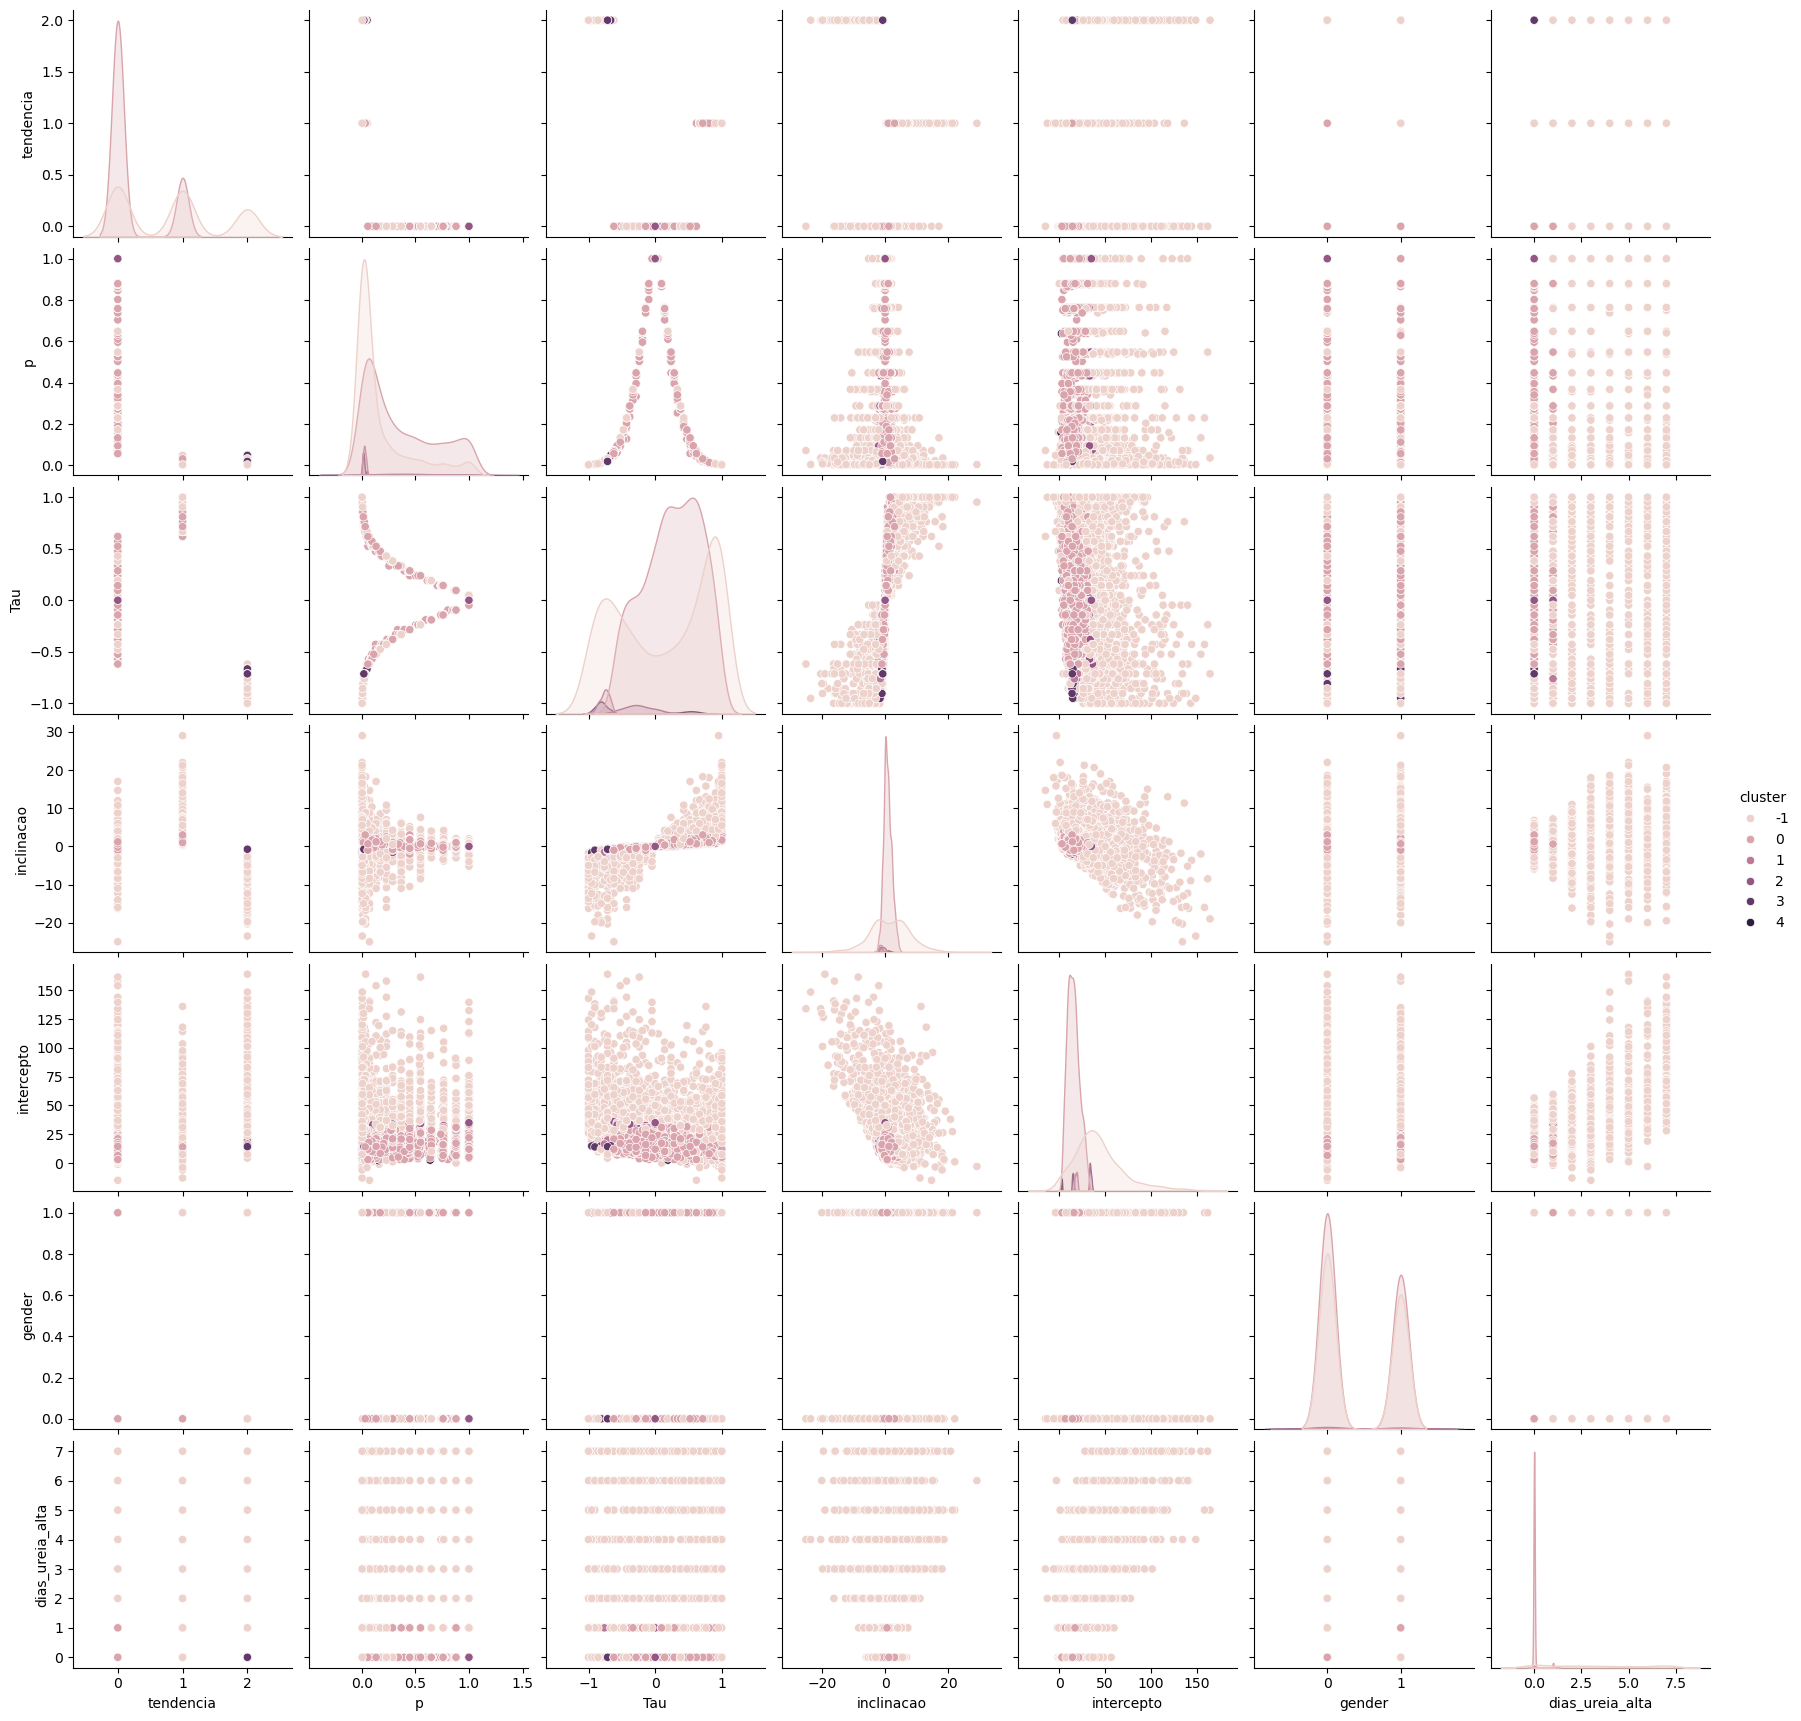

In [38]:
df_temp = df_ureia.copy()
df_temp["cluster"] = y_ureia_minkowski

plt.figure(figsize = (12, 8))

sns.pairplot(df_temp, hue = "cluster")

plt.show()

###### Distância euclidiana

<Figure size 1200x800 with 0 Axes>

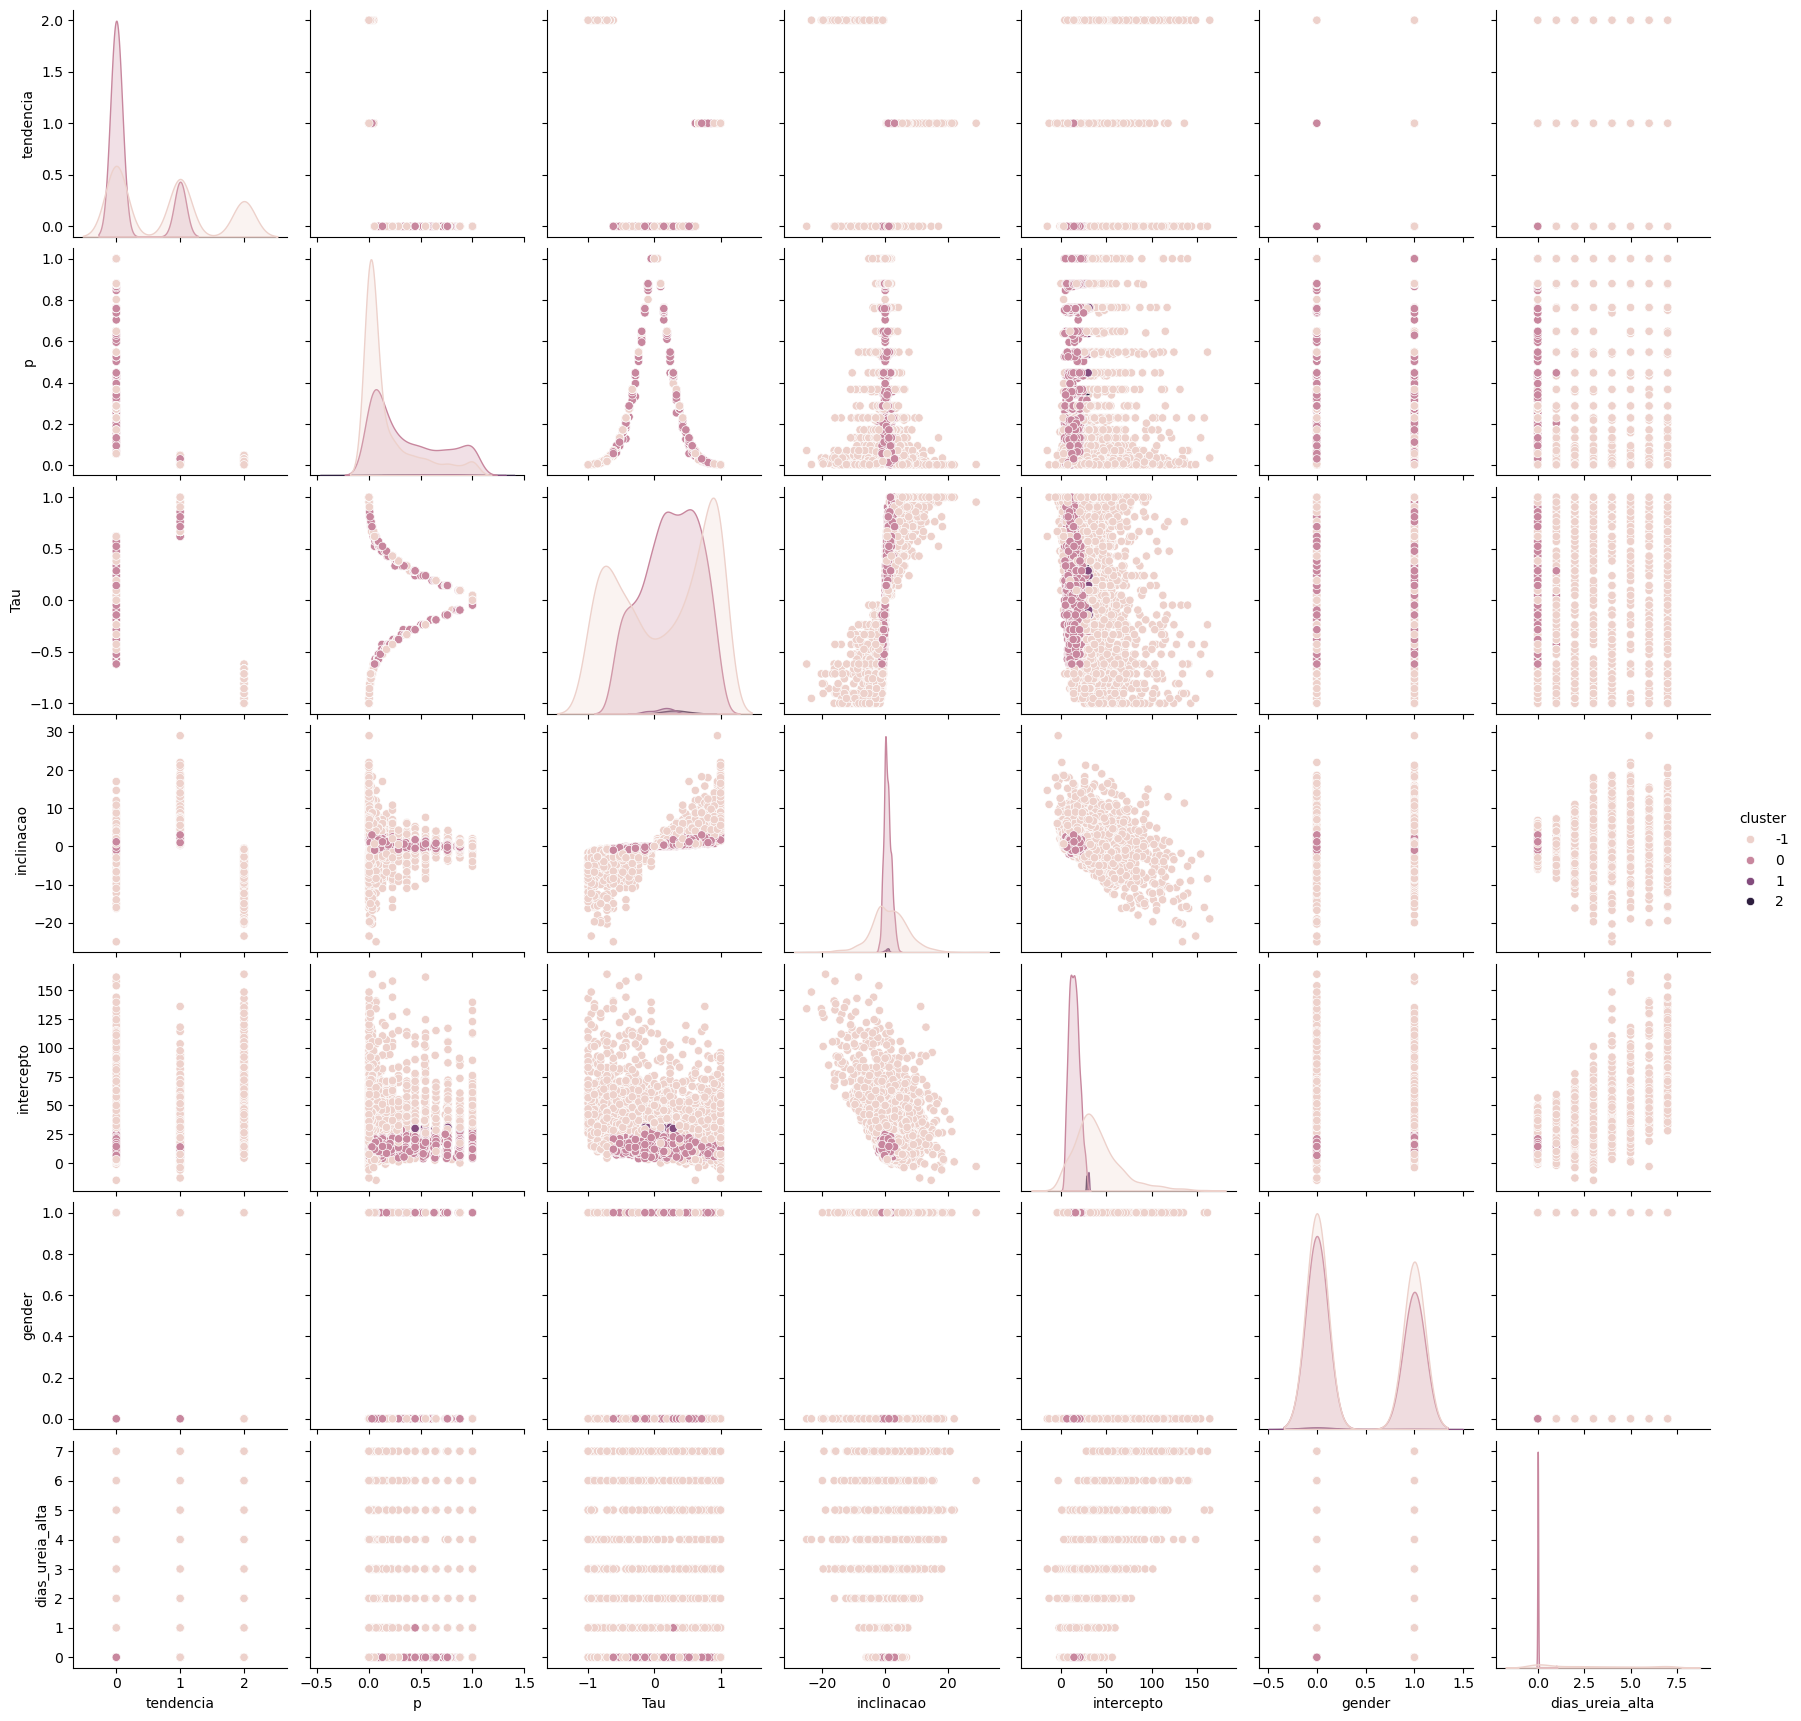

In [39]:
df_temp = df_ureia.copy()
df_temp["cluster"] = y_ureia_euclidean

plt.figure(figsize = (12, 8))

sns.pairplot(df_temp, hue = "cluster")

plt.show()

###### Distância cosine

<Figure size 1200x800 with 0 Axes>

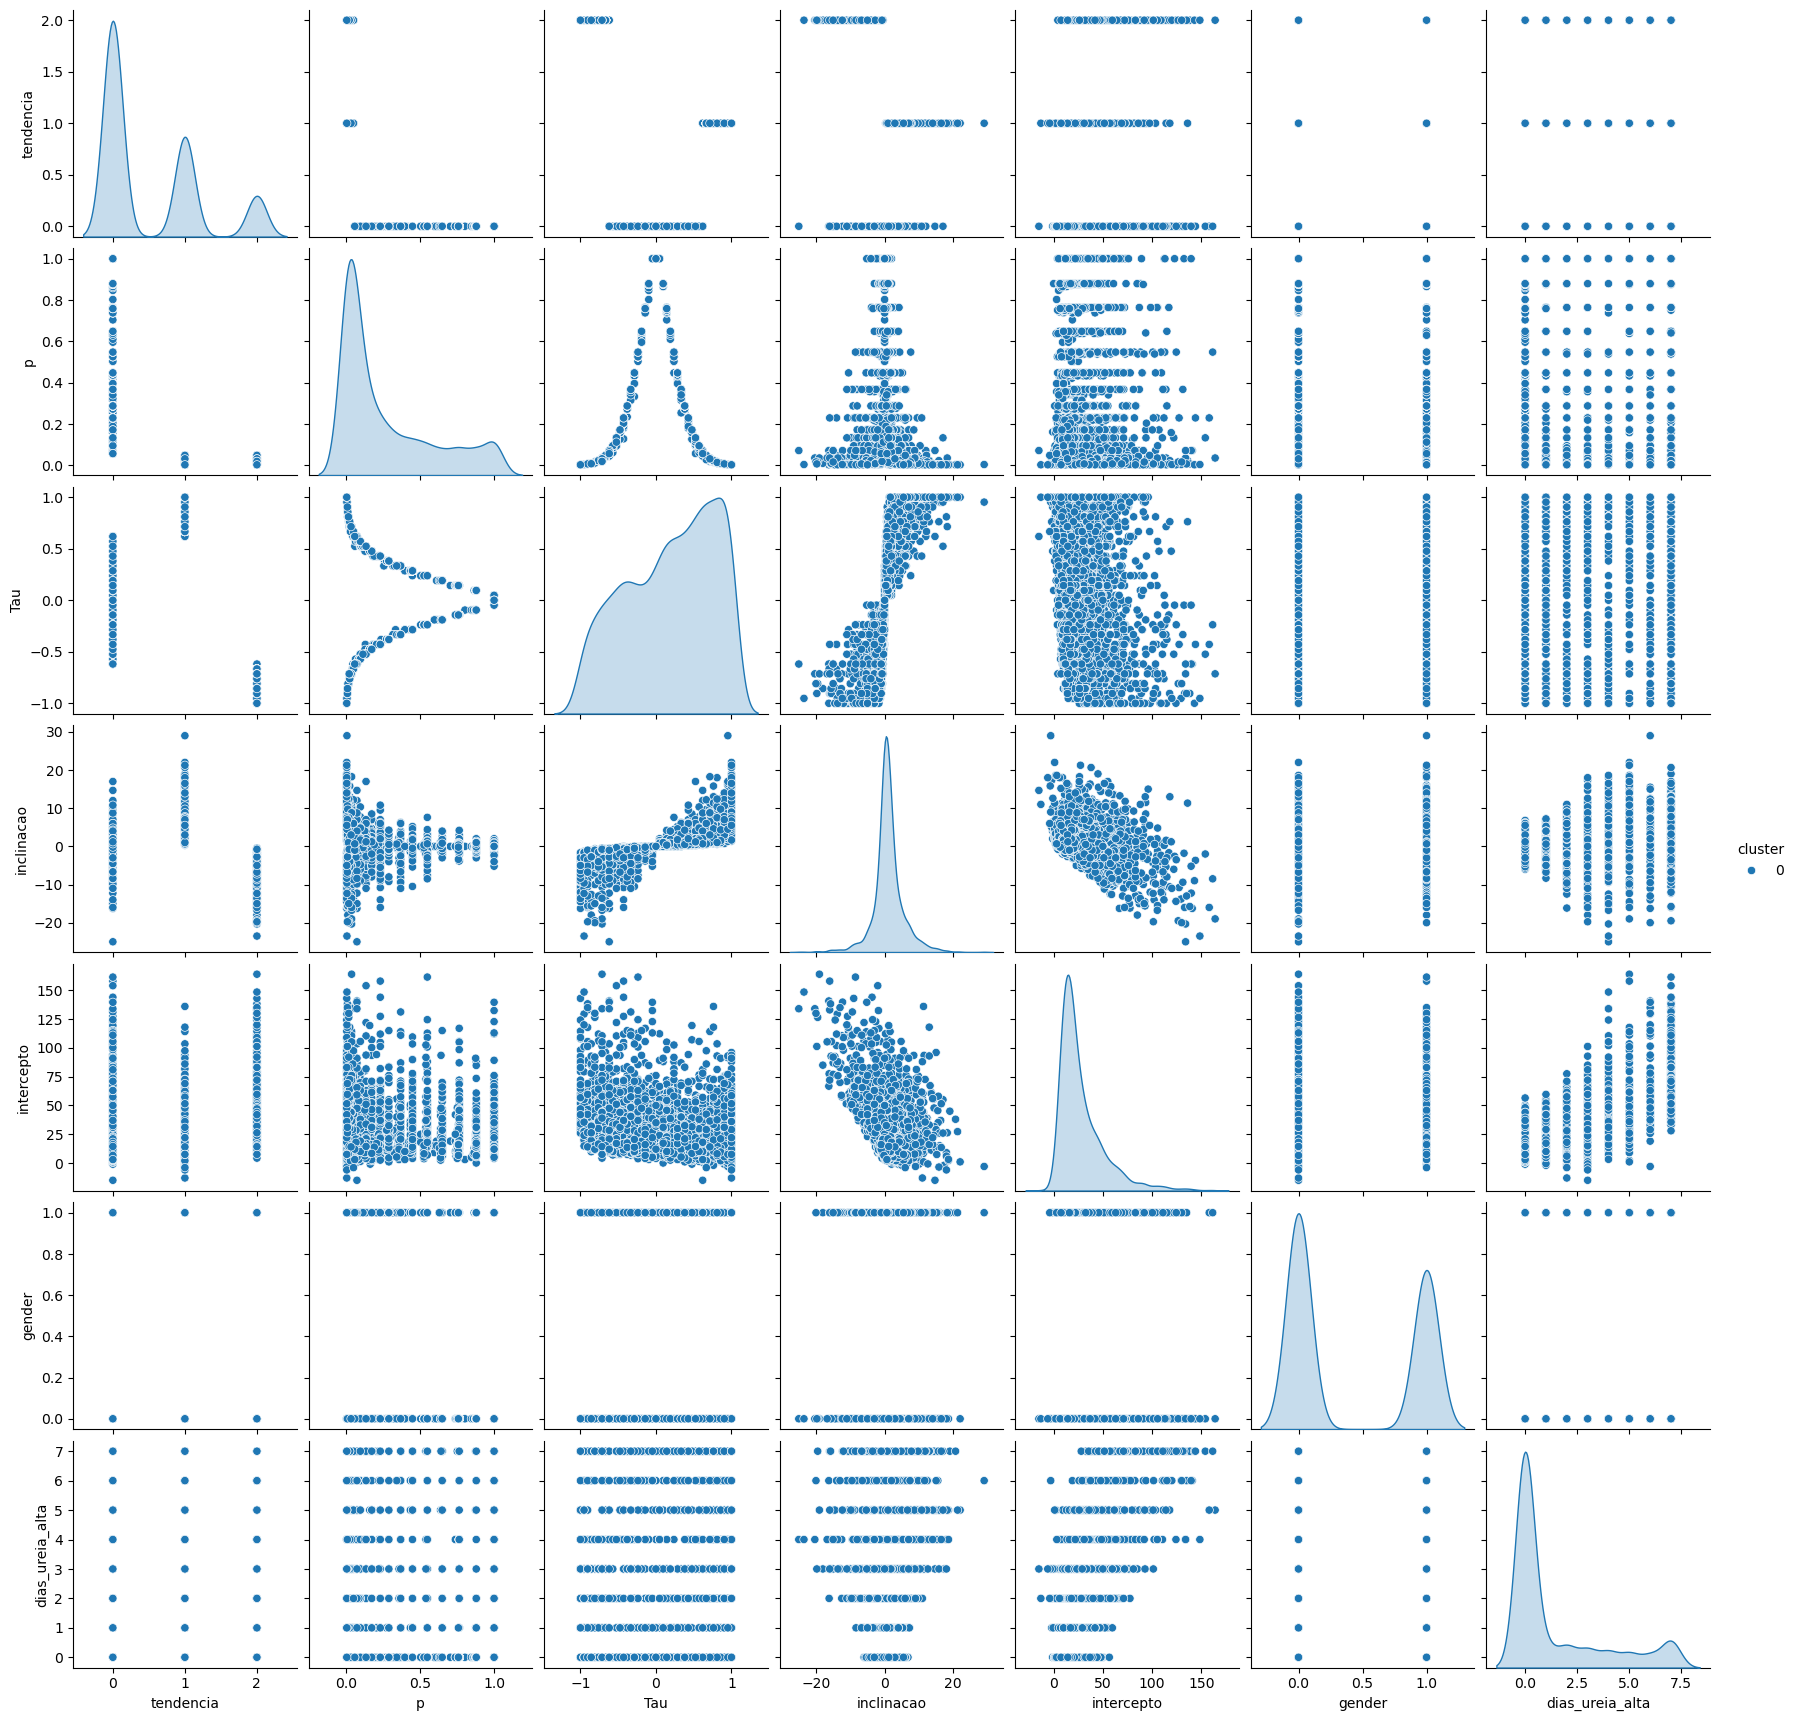

In [40]:
df_temp = df_ureia.copy()
df_temp["cluster"] = y_ureia_cosine

plt.figure(figsize = (12, 8))

sns.pairplot(df_temp, hue = "cluster")

plt.show()

##### RESULTADOS FINAIS:

```txt
Testes informaram resultados com:
- 1 grupo;
- 3 grupos;
- 5 grupos;
- 8 grupos;
- 9 grupos;
- 13 grupos.

Todas essas possibilidades acima foram testadas. Todavia as que performaram melhor foram:
- 1 grupo (Cosseno);
- 3 grupos (Minkowski e Euclideana);
- 5 grupos (Outras).
```

#### DATASET creatinina

#### Testes com iteração por laço `for` utilizando diferentes parâmetros

##### Diferentes quantidades de epoocas

In [41]:
modelos = []

for nro_epocas in lista_de_epocas:
    dbscan = DBSCAN(eps = nro_epocas,
                    n_jobs = -1)
    dbscan.fit(df_creatinina)
    modelos.append(dbscan)
    
for modelo in modelos:
    y_dbscan = abs(modelo.labels_)
    qtd_clusters_ = len(set(y_dbscan)) - (1 if -1 in y_dbscan else 0)
    nro_ruidos_ = list(y_dbscan).count(-1)

    print("Modelo com época = ", round(modelo.eps, 1))
    print("=" * 30)
    print("Número estimado  de clusteres: %d" % qtd_clusters_)
    print("Número estimado de pontos considerados ruídos: %d" % nro_ruidos_)
    print("=" * 30, end = "\n\n\n")

Modelo com época =  0.2
Número estimado  de clusteres: 68
Número estimado de pontos considerados ruídos: 0


Modelo com época =  0.3
Número estimado  de clusteres: 66
Número estimado de pontos considerados ruídos: 0


Modelo com época =  0.4
Número estimado  de clusteres: 54
Número estimado de pontos considerados ruídos: 0


Modelo com época =  0.5
Número estimado  de clusteres: 53
Número estimado de pontos considerados ruídos: 0


Modelo com época =  0.6
Número estimado  de clusteres: 52
Número estimado de pontos considerados ruídos: 0


Modelo com época =  0.7
Número estimado  de clusteres: 50
Número estimado de pontos considerados ruídos: 0


Modelo com época =  0.8
Número estimado  de clusteres: 49
Número estimado de pontos considerados ruídos: 0


Modelo com época =  0.9
Número estimado  de clusteres: 48
Número estimado de pontos considerados ruídos: 0


Modelo com época =  1.0
Número estimado  de clusteres: 28
Número estimado de pontos considerados ruídos: 0


Modelo com época = 

##### Diferentes valores de peso mínimo

In [42]:
modelos = []

for peso_minimo in lista_peso_minimo:
    dbscan = DBSCAN(eps = 1.1,
                    min_samples = peso_minimo,
                    n_jobs = -1)
    dbscan.fit(df_creatinina)
    modelos.append(dbscan)
    
for modelo in modelos:
    y_dbscan = abs(modelo.labels_)
    qtd_clusters_ = len(set(y_dbscan)) - (1 if -1 in y_dbscan else 0)
    nro_ruidos_ = list(y_dbscan).count(-1)

    print("Modelo com peso mínimo = ", round(modelo.min_samples, 1))
    print("=" * 30)
    print("Númber estimado  de clusteres: %d" % qtd_clusters_)
    print("Número estimado de pontos considerados ruídos: %d" % nro_ruidos_, end = "\n\n\n")

Modelo com peso mínimo =  2
Númber estimado  de clusteres: 4
Número estimado de pontos considerados ruídos: 0


Modelo com peso mínimo =  3
Númber estimado  de clusteres: 3
Número estimado de pontos considerados ruídos: 0


Modelo com peso mínimo =  4
Númber estimado  de clusteres: 2
Número estimado de pontos considerados ruídos: 0


Modelo com peso mínimo =  5
Númber estimado  de clusteres: 2
Número estimado de pontos considerados ruídos: 0


Modelo com peso mínimo =  6
Númber estimado  de clusteres: 2
Número estimado de pontos considerados ruídos: 0


Modelo com peso mínimo =  7
Númber estimado  de clusteres: 2
Número estimado de pontos considerados ruídos: 0


Modelo com peso mínimo =  8
Númber estimado  de clusteres: 2
Número estimado de pontos considerados ruídos: 0


Modelo com peso mínimo =  9
Númber estimado  de clusteres: 2
Número estimado de pontos considerados ruídos: 0


Modelo com peso mínimo =  10
Númber estimado  de clusteres: 2
Número estimado de pontos considerados ruí

##### Diferentes metricas

###### Minkowski

In [43]:
modelos = []

for p in lista_parametro_minkowski:
    dbscan = DBSCAN(eps = 1.1,
                    min_samples = 3,
                    metric = "minkowski",
                    p = p,
                    n_jobs = -1)
    dbscan.fit(df_creatinina)
    modelos.append(dbscan)
    
for modelo in modelos:
    y_dbscan = abs(modelo.labels_)
    qtd_clusters_ = len(set(y_dbscan)) - (1 if -1 in y_dbscan else 0)
    nro_ruidos_ = list(y_dbscan).count(-1)

    print("Modelo com p = ", modelo.p)
    print("=" * 30)
    print("Númber estimado  de clusteres: %d" % qtd_clusters_)
    print("Número estimado de pontos considerados ruídos: %d" % nro_ruidos_, end = "\n\n\n")

Modelo com p =  1.0
Númber estimado  de clusteres: 9
Número estimado de pontos considerados ruídos: 0


Modelo com p =  2.0
Númber estimado  de clusteres: 3
Número estimado de pontos considerados ruídos: 0


Modelo com p =  4.0
Númber estimado  de clusteres: 3
Número estimado de pontos considerados ruídos: 0




###### Outras

In [44]:
modelos = []

for metrica in lista_metrica:
    dbscan = DBSCAN(eps = 1.1,
                    min_samples = 4,
                    metric = metrica,
                    n_jobs = -1)
    dbscan.fit(df_creatinina)
    modelos.append(dbscan)
    
for modelo in modelos:
    y_dbscan = abs(modelo.labels_)
    qtd_clusters_ = len(set(y_dbscan)) - (1 if -1 in y_dbscan else 0)
    nro_ruidos_ = list(y_dbscan).count(-1)

    print("Modelo com métrica = ", modelo.metric)
    print("=" * 30)
    print("Númber estimado  de clusteres: %d" % qtd_clusters_)
    print("Número estimado de pontos considerados ruídos: %d" % nro_ruidos_, end = "\n\n\n")

Modelo com métrica =  cityblock
Númber estimado  de clusteres: 6
Número estimado de pontos considerados ruídos: 0


Modelo com métrica =  cosine
Númber estimado  de clusteres: 1
Número estimado de pontos considerados ruídos: 0


Modelo com métrica =  euclidean
Númber estimado  de clusteres: 2
Número estimado de pontos considerados ruídos: 0


Modelo com métrica =  l1
Númber estimado  de clusteres: 6
Número estimado de pontos considerados ruídos: 0


Modelo com métrica =  l2
Númber estimado  de clusteres: 2
Número estimado de pontos considerados ruídos: 0


Modelo com métrica =  manhattan
Númber estimado  de clusteres: 6
Número estimado de pontos considerados ruídos: 0




##### Diferentes algoritmos

In [45]:
modelos = []

for algoritmo in lista_algoritmo:
    for tam_folha in lista_tamanho_folha:
        dbscan = DBSCAN(eps = 1.1,
                        min_samples = 3,
                        algorithm = algoritmo,
                        metric = "minkowski",
                        p = 4,
                        leaf_size = tam_folha,
                        n_jobs = -1)
        dbscan.fit(df_creatinina)
        modelos.append(dbscan)
    
for modelo in modelos:
    y_dbscan = abs(modelo.labels_)
    qtd_clusters_ = len(set(y_dbscan)) - (1 if -1 in y_dbscan else 0)
    nro_ruidos_ = list(y_dbscan).count(-1)

    print("Modelo com algoritmo = ", modelo.algorithm)
    print("Modelo com tamanho de folha = ", modelo.leaf_size)
    print("=" * 30)
    print("Númber estimado  de clusteres: %d" % qtd_clusters_)
    print("Número estimado de pontos considerados ruídos: %d" % nro_ruidos_, end = "\n\n\n")

Modelo com algoritmo =  auto
Modelo com tamanho de folha =  20
Númber estimado  de clusteres: 3
Número estimado de pontos considerados ruídos: 0


Modelo com algoritmo =  auto
Modelo com tamanho de folha =  30
Númber estimado  de clusteres: 3
Número estimado de pontos considerados ruídos: 0


Modelo com algoritmo =  auto
Modelo com tamanho de folha =  40
Númber estimado  de clusteres: 3
Número estimado de pontos considerados ruídos: 0


Modelo com algoritmo =  auto
Modelo com tamanho de folha =  50
Númber estimado  de clusteres: 3
Número estimado de pontos considerados ruídos: 0


Modelo com algoritmo =  ball_tree
Modelo com tamanho de folha =  20
Númber estimado  de clusteres: 3
Número estimado de pontos considerados ruídos: 0


Modelo com algoritmo =  ball_tree
Modelo com tamanho de folha =  30
Númber estimado  de clusteres: 3
Número estimado de pontos considerados ruídos: 0


Modelo com algoritmo =  ball_tree
Modelo com tamanho de folha =  40
Númber estimado  de clusteres: 3
Número 

##### Criando modelos baseados nos testes

###### Distância de Minkowski

In [46]:
dbscan_creatinina = DBSCAN(eps = 1.1,
                          min_samples = 3,
                          algorithm = "ball_tree",
                          leaf_size = 20,
                          metric = "minkowski",
                          p = 4,
                          n_jobs = -1)
y_creatinina_minkowski = dbscan_creatinina.fit_predict(df_creatinina)

###### Distância euclidiana

In [47]:
dbscan_creatinina = DBSCAN(eps = 1.1,
                          min_samples = 4,
                          algorithm = "ball_tree",
                          leaf_size = 20,
                          metric = "euclidean",
                          n_jobs = -1)
y_creatinina_euclidean = dbscan_creatinina.fit_predict(df_creatinina)

###### Coseno

In [48]:
dbscan_creatinina = DBSCAN(eps = 1.1,
                          min_samples = 1,
                          algorithm = "brute",
                          leaf_size = 20,
                          metric = "cosine",
                          n_jobs = -1)
y_creatinina_cosine = dbscan_creatinina.fit_predict(df_creatinina)

##### Testando com diferentes métricas de avaliação

###### Distância de Minkowski

In [49]:
silhouette:list[float] = []

for metrica in lista_metricas_silhueta:
    silhouette.append(silhouette_score(df_creatinina, y_creatinina_minkowski, metric = metrica))

davies_bouldin:float = davies_bouldin_score(df_creatinina, y_creatinina_minkowski)
calinski_harabasz:float = calinski_harabasz_score(df_creatinina, y_creatinina_minkowski)

print("SILHOUETTE SCORE: ", silhouette, end = "\n")
print("DAVIS-BOULDIN SCORE: ", davies_bouldin, end = "\n")
print("CALINSKI-HARABASZ SCORE: ", calinski_harabasz, end = "\n")

SILHOUETTE SCORE:  [0.24429220827729412, -0.20407484778691268, 0.1376296798175217, 0.24429220827729412, 0.1376296798175217, 0.24429220827729412]
DAVIS-BOULDIN SCORE:  2.7568158235798355
CALINSKI-HARABASZ SCORE:  100.02309763195439


###### Distância euclidiana

In [50]:
silhouette:list[float] = []

for metrica in lista_metricas_silhueta:
    silhouette.append(silhouette_score(df_creatinina, y_creatinina_euclidean, metric = metrica))

davies_bouldin:float = davies_bouldin_score(df_creatinina, y_creatinina_euclidean)
calinski_harabasz:float = calinski_harabasz_score(df_creatinina, y_creatinina_euclidean)

print("SILHOUETTE SCORE: ", silhouette, end = "\n")
print("DAVIS-BOULDIN SCORE: ", davies_bouldin, end = "\n")
print("CALINSKI-HARABASZ SCORE: ", calinski_harabasz, end = "\n")

SILHOUETTE SCORE:  [0.2525061537408866, -0.12756218403065134, 0.1416515194839926, 0.2525061537408866, 0.1416515194839926, 0.2525061537408866]
DAVIS-BOULDIN SCORE:  2.279718644264271
CALINSKI-HARABASZ SCORE:  151.74116884133508


##### Imprimindo o resultado dos testes

###### Distância de Minkowski

<Figure size 1200x800 with 0 Axes>

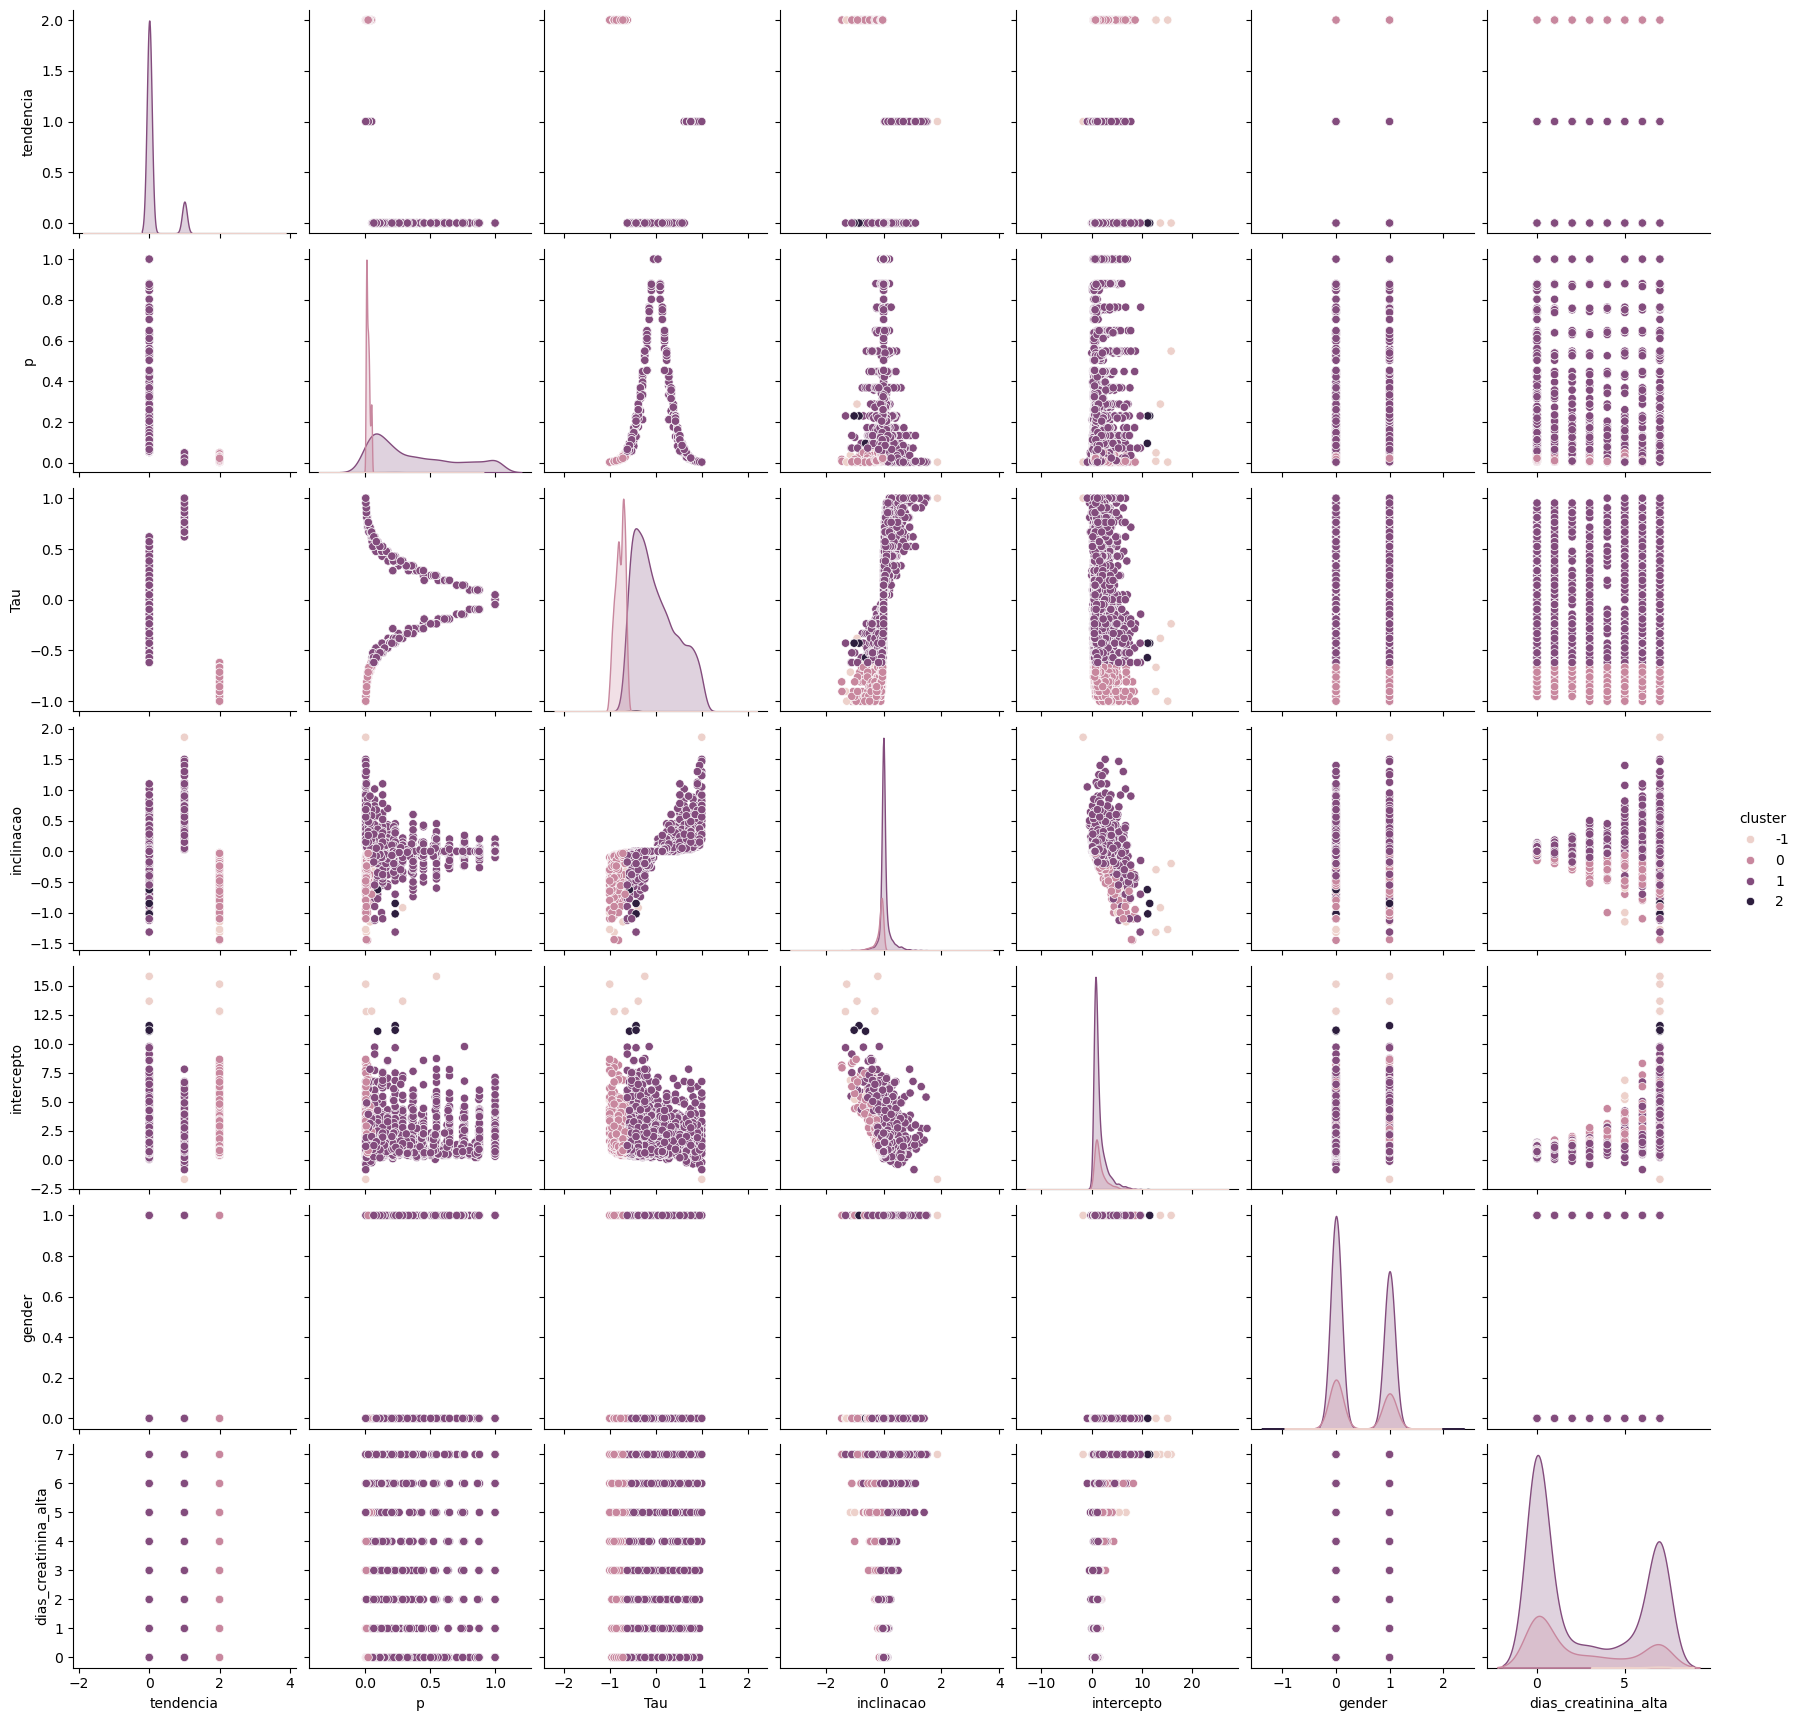

In [51]:
df_temp = df_creatinina.copy()
df_temp["cluster"] = y_creatinina_minkowski

plt.figure(figsize = (12, 8))

sns.pairplot(df_temp, hue = "cluster")

plt.show()

###### Distância euclidiana

<Figure size 1200x800 with 0 Axes>

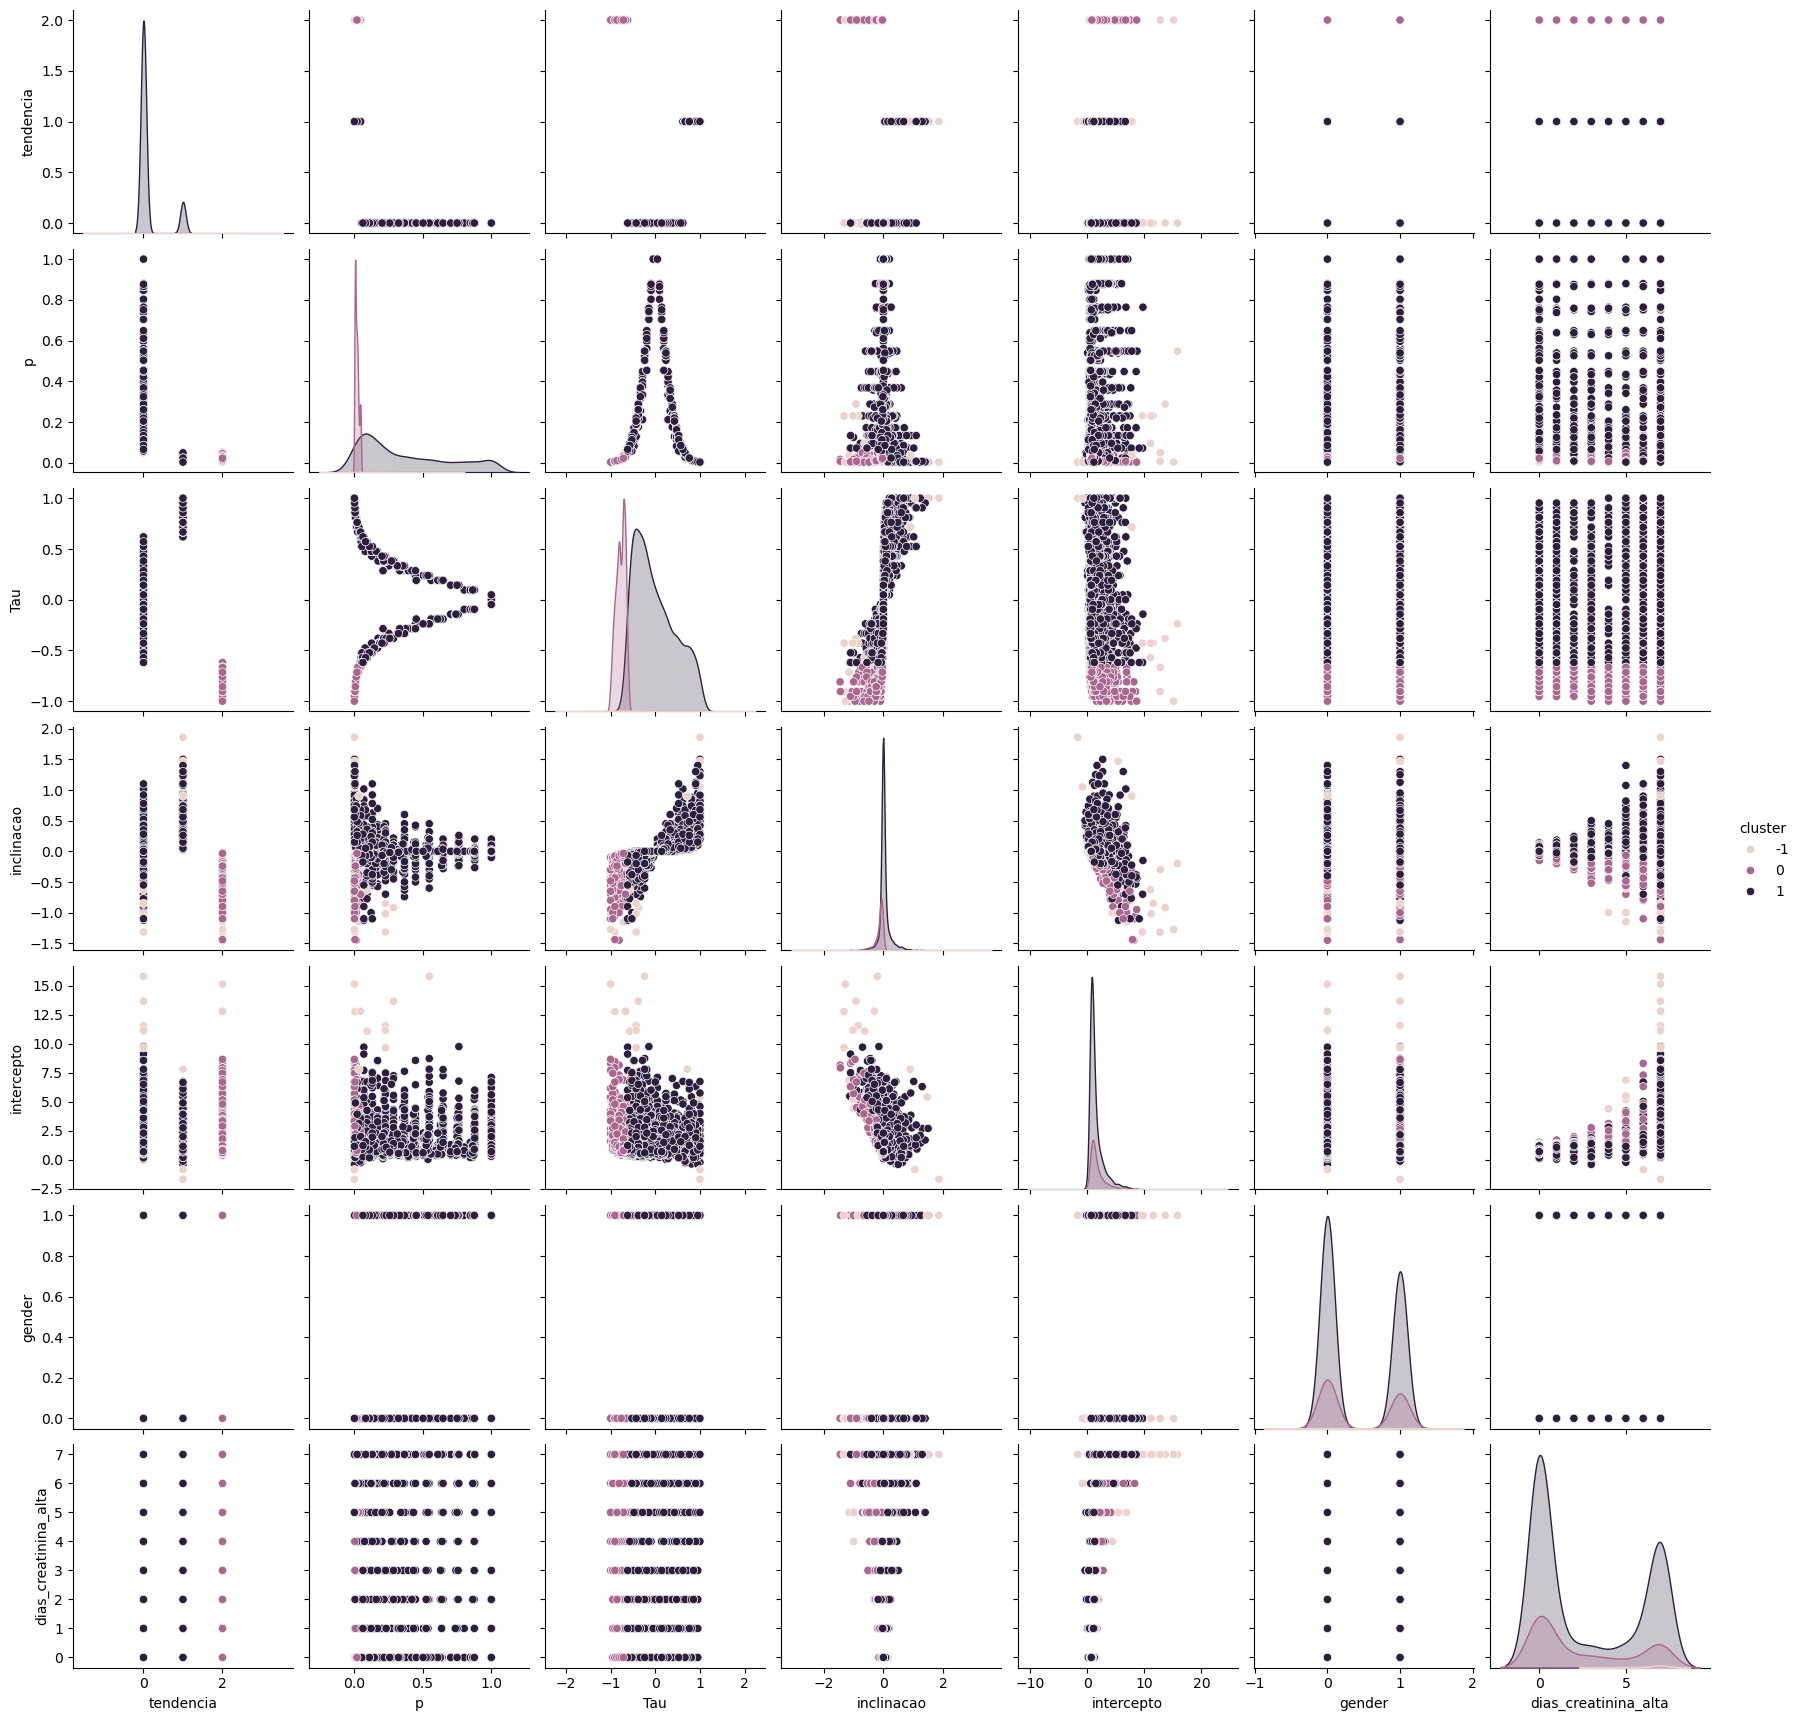

In [52]:
df_temp = df_creatinina.copy()
df_temp["cluster"] = y_creatinina_euclidean

plt.figure(figsize = (12, 8))

sns.pairplot(df_temp, hue = "cluster")

plt.show()

###### Distância cosine

<Figure size 1200x800 with 0 Axes>

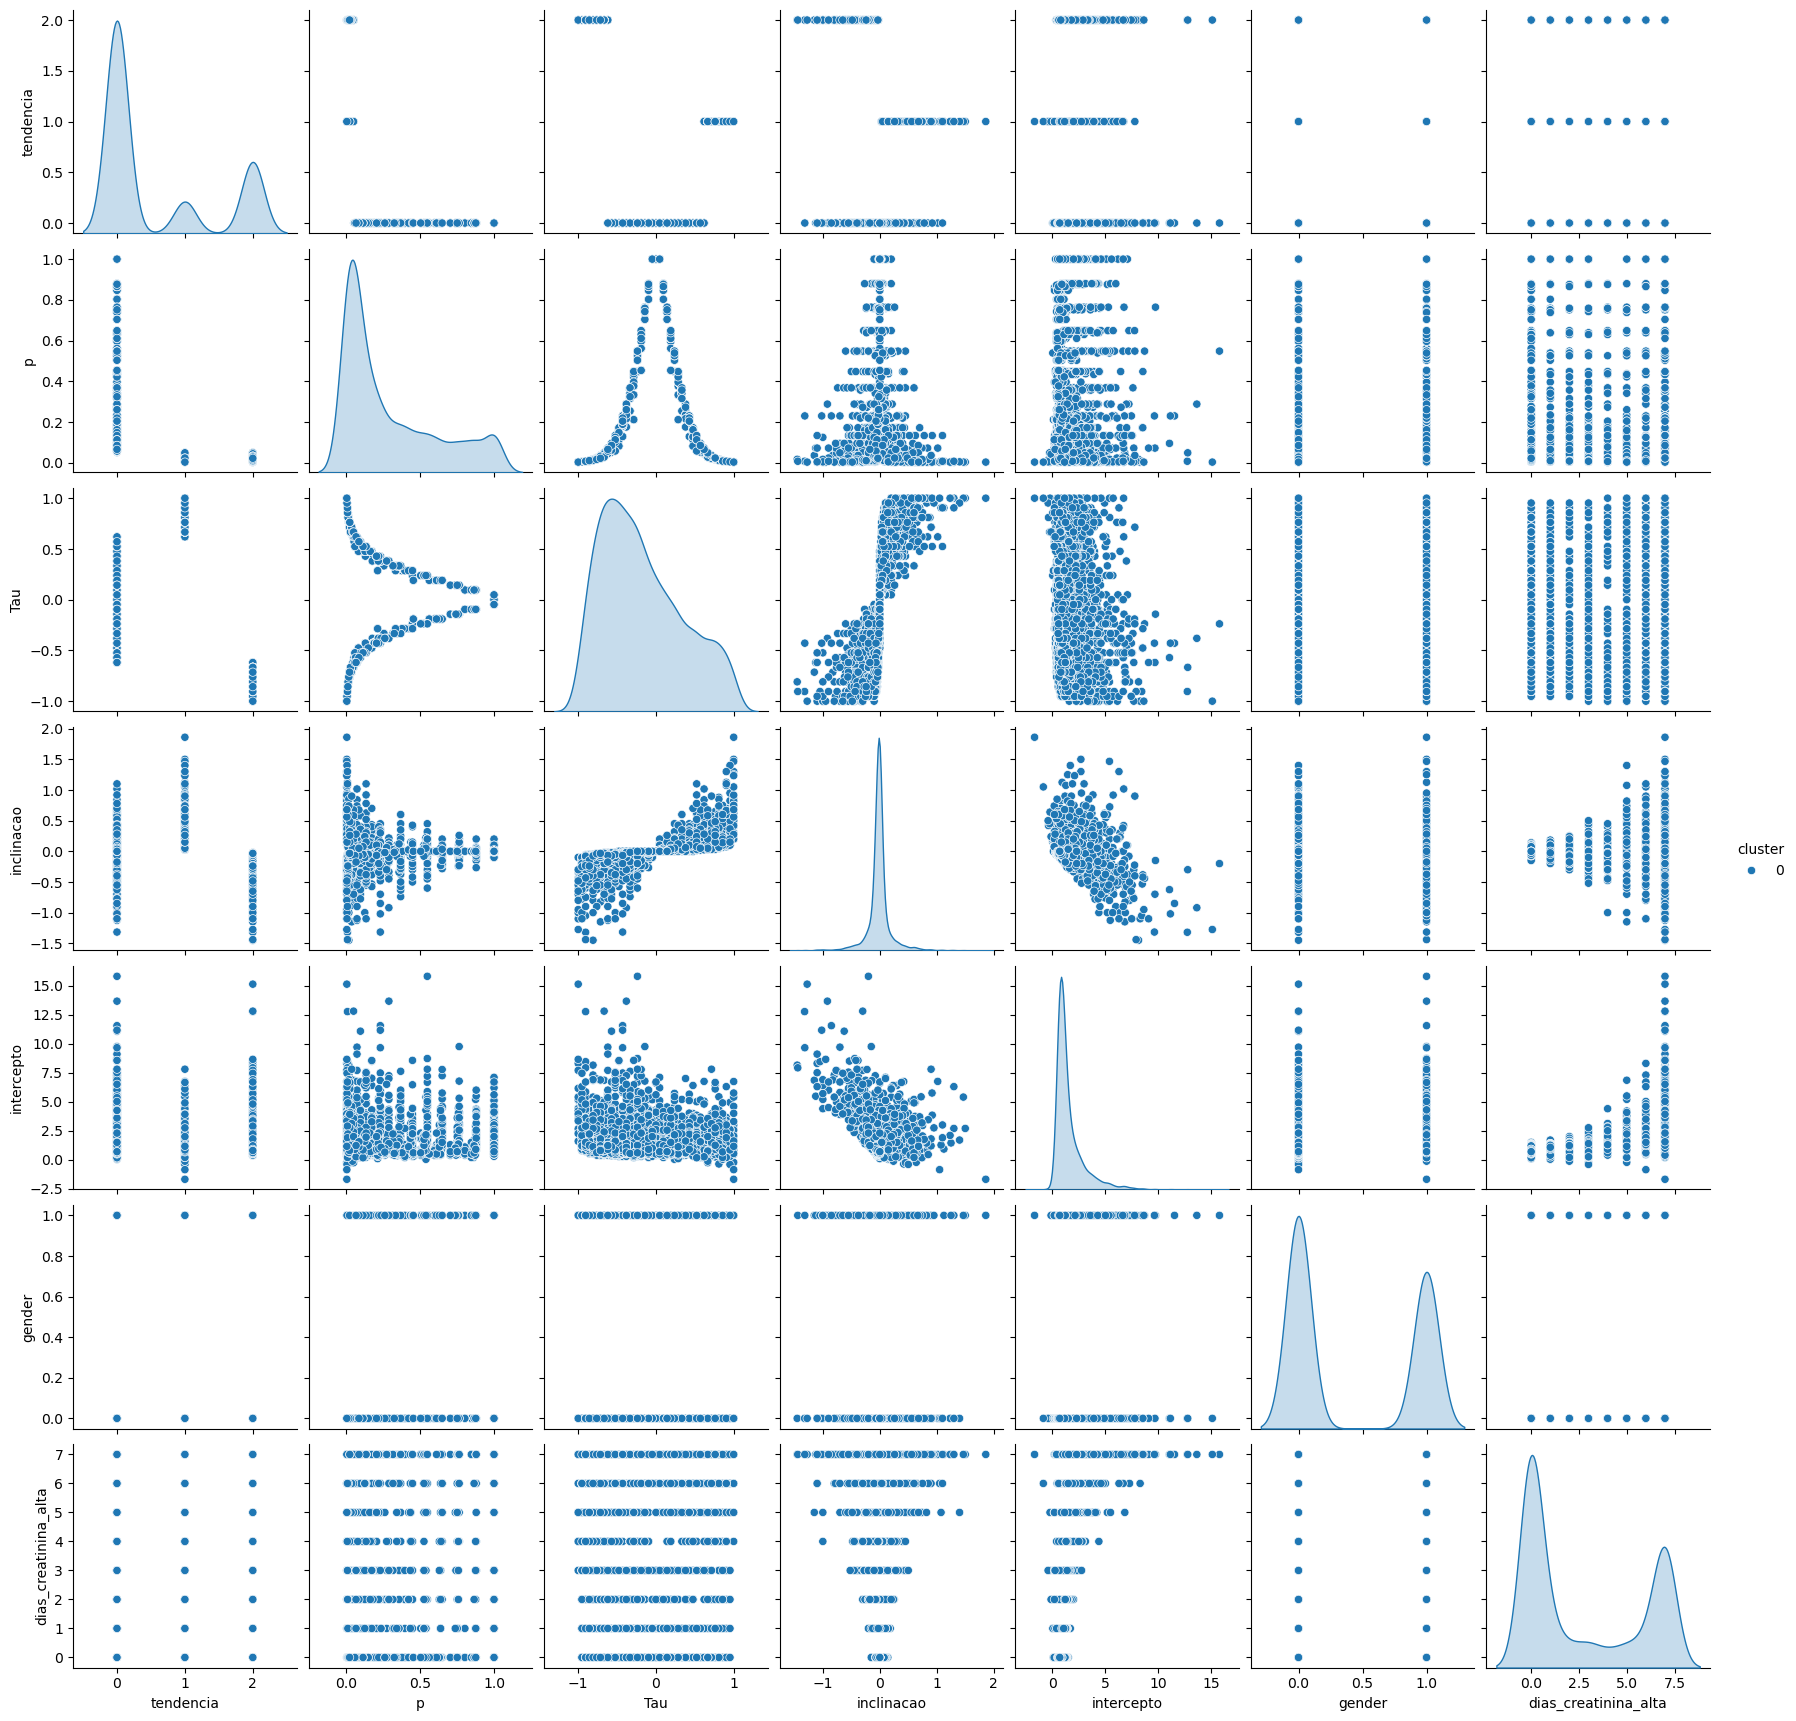

In [53]:
df_temp = df_creatinina.copy()
df_temp["cluster"] = y_creatinina_cosine

plt.figure(figsize = (12, 8))

sns.pairplot(df_temp, hue = "cluster")

plt.show()

##### RESULTADOS FINAIS:

```txt
Testes informaram resultados com:
- 1 grupo;
- 2 grupos;
- 3 grupos;
- 4 grupos;
- 13 grupos.

Todas essas possibilidades acima foram testadas. Todavia as que performaram melhor foram:
- 1 grupo (Cosseno);
- 2 grupos (Euclideana);
- 3 grupos (Minkowski).
```